<a href="https://colab.research.google.com/github/sivani-tutika/LLM-Growth-Training/blob/main/Wiki_2_dataset_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


KeyboardInterrupt: 

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

tnssivani_shakespeare_dataset_path = kagglehub.dataset_download('tnssivani/shakespeare-dataset')

print('Data source import complete.')


<a href="https://colab.research.google.com/github/sivani-tutika/LLM-Growth-Training/blob/main/When_to_grow_shakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Best models of pre-trained methods

Comperative Survey:

Wiki - 2

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


Wiki - 103

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


Shakespeare

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Stacking|-|-|-|-|-|
|LiGO Depth only|-|-|-|-|-|
|CrossLiGO depth only|-|-|-|-|-|
|StackLiGO depth only|-|-|-|-|-|


---

"When to grow policy"

Wiki-2

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

Wiki-103

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

Shakespeare

| Model | Category | Validation Loss | Training FLOPs | Memory | Time |
|-|-|-|-|-|-|
|Periodic|-|-|-|-|-|
|Convergence|-|-|-|-|-|
|LipGrow|-|-|-|-|-|
|FRAWGrow|-|-|-|-|-|

# Libraries

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ---------------------------------------- 6.1/6.1 MB 31.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 GB 124.1 MB/s eta 0:00:20
    --------------------------------------- 0.0/2.5 GB 122.0 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 120.0 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 119.7 MB/s eta 0:00:21
   - -------------------------------------- 0.1/2.5 GB 118.5 MB/s eta 0:00:21
   -- ------------------------------------- 0.1/2.5 GB 114.6 MB/s eta 0:00:21
   -- ------------------------------------- 0.2/2.5 GB 113.0 MB/s eta 0:00:21
   -- ------------------------------------- 0.2/2.5 GB 112.8 MB/s eta 0:00:21
   --- ------------------------------------ 0.2/2.5 GB 111.0 MB/s eta 0:00:21
   --- -----------------

In [1]:
!pip install pytorch
!pip install transformers
!pip install datasets
!pip install calflops
!pip install matplotlib

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [2]:
import math
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import GPT2Tokenizer, DataCollatorForLanguageModeling
from datasets import load_dataset
from calflops import calculate_flops
import matplotlib.pyplot as plt
import time

# Settings

In [3]:
# LiGO_bool = True
# emb_size = 256
# new_emb_size = 512
# block_size = 128
# multi_heads = 2
# batch_size = 16
# epochs = 3
# learning_rate = 3e-4
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8


LiGO_bool = True
emb_size = 128
new_emb_size = 256
block_size = 64
multi_heads = 2
batch_size = 16
epochs = 3
learning_rate = 3e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_small_layers = 4
multi_heads = 2
num_large_layers = 8
batches_per_epoch = 10

# Datasets

## Shakespeare

In [4]:
# import torch

# path = '/kaggle/input/shakespeare-dataset/shakespeare_dat.txt'
# # Load and process Shakespeare dataset
# with open(path, 'r') as f:
#     dat = f.read()

# chars = sorted(list(set(dat)))
# stoi = {ch: i for i, ch in enumerate(chars)}
# itos = {i: ch for i, ch in enumerate(chars)}
# encode = lambda s: [stoi[c] for c in s]
# decode = lambda i: ''.join([itos[l] for l in i])

# # Convert text to tensor
# data = torch.tensor(encode(dat))

# # Train-test split (90% train, 10% validation)
# n = int(0.9 * len(data))
# shakespeare_train = data[:n]
# shakespeare_val = data[n:]

# #Dataset wikitext-2
dataset = load_dataset('wikitext', 'wikitext-2-v1')

# Dataset wikitext-103
# dataset = load_dataset('wikitext', 'wikitext-103-raw-v1')

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# padding token
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
vocab_size = len(tokenizer)

def tokenize_function(examples):
    return tokenizer(examples['text'], return_tensors='pt', truncation=True, padding='max_length', max_length=block_size)

tokenized_datasets = dataset.map(tokenize_function, batched=True, remove_columns=["text"])
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

train_dataset = tokenized_datasets["train"]
val_dataset = tokenized_datasets["validation"]
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, collate_fn=data_collator)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=batch_size, collate_fn=data_collator)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/685k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.07M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/618k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Map:   0%|          | 0/4358 [00:00<?, ? examples/s]

Map:   0%|          | 0/36718 [00:00<?, ? examples/s]

Map:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [5]:
train_dataloader = list(train_dataloader)
val_dataloader = list(val_dataloader)

In [6]:

# # Hyperparameters
# LiGO_bool = True
# block_size = 8
# batch_size = 2048
# val_batch_size = 2048
# vocab_size = len(chars)
# emb_size = 32
# new_emb_size = 64
# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [7]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# import numpy as np

# # Load Shakespeare text from file
# with open('/content/shakespeare_dat.txt', 'r') as f:
#     dat = f.read()

# # Character mappings
# chars = sorted(list(set(dat)))
# stoi = {ch: i for i, ch in enumerate(chars)}
# itos = {i: ch for i, ch in enumerate(chars)}
# encode = lambda s: [stoi[c] for c in s]  # Convert text to integer list
# decode = lambda i: ''.join([itos[l] for l in i])  # Convert int list to text


# # Hyperparameters (Global)
# block_size = 8
# batch_size = 2048
# val_batch_size = 2048
# vocab_size = len(chars)
# train_frac = 0.9  # Fraction for train-validation split


# # Convert text data to tensor
# data = torch.tensor(encode(dat), dtype=torch.long)

# # Shuffle and Split Dataset
# def shuffle_and_split(data, train_frac=0.9):
#     n = int(train_frac * len(data))  # Split point
#     indices = torch.randperm(len(data)).tolist()  # Shuffle indices
#     train_data = data[indices[:n]]
#     val_data = data[indices[n:]]
#     return train_data, val_data

# # Shuffle and split data
# train_data, val_data = shuffle_and_split(data)

# # Define a PyTorch Dataset
# class ShakespeareDataset(Dataset):
#     def __init__(self, data, block_size):
#         self.data = data
#         self.block_size = block_size

#     def __len__(self):
#         return len(self.data) - self.block_size

#     def __getitem__(self, idx):
#         x = self.data[idx:idx + self.block_size]
#         y = self.data[idx + 1:idx + self.block_size + 1]
#         return x, y

# # Create DataLoader objects with custom variable names
# shakespeare_train_dataset = ShakespeareDataset(train_data, block_size)
# shakespeare_val_dataset = ShakespeareDataset(val_data, block_size)

# shakespeare_train_loader = DataLoader(shakespeare_train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
# shakespeare_val_loader = DataLoader(shakespeare_val_dataset, batch_size=val_batch_size, shuffle=False, drop_last=True)


# Transformer Architecture

In [8]:
# LiGO_bool = True
# emb_size = 256
# new_emb_size = 512
# block_size = 128
# multi_heads = 2
# batch_size = 16
# epochs = 3
# learning_rate = 3e-4
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# num_small_layers = 4
# multi_heads = 2
# num_large_layers = 8

## Basic blocks

In [9]:
class AttentionHead(torch.nn.Module):
    def __init__(self, big=False):
        super(AttentionHead, self).__init__()
        self.k = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.q = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.v = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size,block_size)))
    def forward(self, e):
        keys = self.k(e)
        queries = self.q(e)
        values = self.v(e)
        ret = keys @ queries.transpose(1, 2)*(1.0/math.sqrt(keys.size(-1)))
        ret = torch.masked_fill(ret, self.tril==0, -torch.inf)
        ret = torch.softmax(ret, 2)
        ret = ret @ values
        return ret

In [10]:
class MultiHead(torch.nn.Module):
    def __init__(self, big=False):
        super(MultiHead, self).__init__()
        self.head1 = AttentionHead(big)
        self.head2 = AttentionHead(big)
        self.mh_lin = torch.nn.Linear(multi_heads*(new_emb_size if big else emb_size), new_emb_size if big else emb_size, bias=False)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        x1 = self.head1(inp)
        x2 = self.head2(inp)
        return self.mh_lin(self.drop(torch.cat([x1,x2], dim=2))).relu()

In [11]:
class PositionalEncoding(torch.nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = torch.nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [12]:
class Block(torch.nn.Module):
    def __init__(self, big=False):
        super(Block, self).__init__()
        self.multihead = MultiHead(big)
        self.l_norm_1 = torch.nn.LayerNorm(new_emb_size if big else emb_size)
        self.l_norm_2 = torch.nn.LayerNorm(new_emb_size if big else emb_size)
        self.ffn = torch.nn.Linear(new_emb_size if big else emb_size, new_emb_size if big else emb_size)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        m = self.l_norm_1(inp + self.multihead(inp))
        m = self.l_norm_2(m + self.ffn(self.drop(m)).relu())
        return m

# Train & Validation


## Static methods

In [13]:
# loss_fn = torch.nn.CrossEntropyLoss()

# @torch.no_grad()
# def validate(mdl, dataloader):
#     mdl.to(device)
#     mdl.eval()
#     total_loss = 0
#     num_batches = 0

#     torch.cuda.reset_peak_memory_stats(device)  # Reset memory stats

#     start_time = time.time()
#     for batch in dataloader:
#         inputs = batch["input_ids"].squeeze(1).to(device)
#         outputs = mdl(inputs)
#         loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#         total_loss += loss.item()
#         num_batches += 1

#     val_time = time.time() - start_time
#     max_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)

#     print(f"Validation Time: {val_time:.2f}s, Max Memory Usage: {max_memory:.2f} MB")

#     return total_loss / num_batches


# import torch
# import time
# import psutil

# def get_cpu_memory():
#     """Returns current CPU memory usage in MB."""
#     process = psutil.Process()
#     return process.memory_info().rss / (1024 ** 2)  # Convert bytes to MB

# def train(mdl, optim, epochs, train_dataloader, val_dataloader):
#     mdl.to(device)

#     train_losses_epoch = []
#     val_losses_epoch = []

#     train_times = []   # Training time per epoch
#     val_times = []     # Validation time per epoch
#     gpu_memory_usage = []  # GPU memory per epoch
#     cpu_memory_usage = []  # CPU memory per epoch
#     flops_per_epoch = []   # FLOPs per epoch

#     for epoch in range(epochs):
#         start_time = time.time()
#         mdl.train()
#         total_loss = 0
#         num_batches = 0
#         total_flops = 0  # Track FLOPs for this epoch

#         torch.cuda.reset_peak_memory_stats(device)  # Reset GPU memory tracking

#         for batch in train_dataloader:
#             inputs = batch["input_ids"].squeeze(1).to(device)
#             optim.zero_grad()
#             outputs = mdl(inputs).to(device)
#             loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#             loss.backward()
#             optim.step()

#             total_loss += loss.item()
#             num_batches += 1

#             # Compute FLOPs for this batch
#             flops, _, _ = calculate_flops(model=mdl.to(device), kwargs={'inp': inputs},
#                                           print_detailed=False, print_results=False, output_as_string=False)
#             total_flops += flops  # Accumulate FLOPs

#             if num_batches % 100 == 0:
#                 print(f"{num_batches} processed")

#         train_time = time.time() - start_time  # Epoch training time
#         train_times.append(train_time)

#         # Store memory usage
#         max_gpu_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # MB
#         max_cpu_memory = get_cpu_memory()  # MB

#         # gpu_memory_usage.append(max_gpu_memory)
#         cpu_memory_usage.append(max_cpu_memory)

#         avg_loss = total_loss / num_batches
#         train_losses_epoch.append(avg_loss)

#         # Validate model and track validation time + memory usage
#         val_start_time = time.time()
#         val_loss, _ = validate(mdl, val_dataloader)
#         val_time = time.time() - val_start_time
#         val_times.append(val_time)

#         val_losses_epoch.append(val_loss)

#         # Convert FLOPs to TFLOPs (TeraFLOPs)
#         flops_per_epoch.append(total_flops / 1e12)

#         print(f"Epoch {epoch+1}: Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}, "
#               f"Train Time: {train_time:.2f}s, Val Time: {val_time:.2f}s, "
#               f"GPU Memory: MB, CPU Memory: {max_cpu_memory:.2f} MB, "
#               f"TFLOPs: {total_flops / 1e12:.4f}")

#     return {
#         "train_losses": train_losses_epoch,
#         "val_losses": val_losses_epoch,
#         "train_times": train_times,
#         "val_times": val_times,
#         "gpu_memory": gpu_memory_usage,
#         "cpu_memory": cpu_memory_usage,
#         "flops": flops_per_epoch  # Returning FLOPs per epoch
#     }


In [14]:
# @torch.no_grad()
# def validate(mdl, dataloader):
#     mdl.eval()
#     total_loss = 0
#     num_batches = 0
#     val_losses = []
#     for batch in dataloader:
#         inputs = batch["input_ids"].squeeze(1).to(device)
#         outputs = mdl(inputs)
#         loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#         total_loss += loss.item()
#         num_batches += 1
#         if num_batches % 100 == 0:
#             val_losses.append(total_loss / num_batches)
#     return total_loss / num_batches, val_losses

# @torch.enable_grad()
# def train(mdl, optim, epochs, train_dataloader, val_dataloader):
#     # mdl.to(device)
#     train_losses = []
#     val_losses_epoch = []
#     for epoch in range(epochs):
#         mdl.train()
#         total_loss = 0
#         num_batches = 0
#         for batch in train_dataloader:
#             inputs = batch["input_ids"].squeeze(1).to(device)
#             optim.zero_grad()
#             outputs = mdl(inputs)
#             loss = loss_fn(outputs.view(-1, vocab_size), inputs.view(-1))
#             loss.backward()
#             optim.step()
#             total_loss += loss.item()
#             num_batches += 1
#             if num_batches % 100 == 0:
#                 train_losses.append(total_loss / num_batches)

#         avg_loss = total_loss / num_batches
#         val_loss, val_losses = validate(mdl, val_dataloader)
#         val_losses_epoch.extend(val_losses)
#         print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

#     return train_losses, val_losses_epoch

In [15]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))
        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## Periodic methods

In [16]:
# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)
# def periodic_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def periodic_validate(mdl):
#     mdl.eval()
#     vx, vy = periodic_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()


# @torch.enable_grad()
# def periodic_train(mdl, optim, epochs):
#     ind = 0
#     train_curve = []
#     total_flops = 0
#     flops_per_epoch = []
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []

#     for _ in range(epochs):



#         mdl.train()
#         optim.zero_grad()
#         x, y = periodic_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss_per_epoch.append(l.item())

#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)
#         v = validate(mdl)
#         val_loss_per_epoch.append(v)

#         # if ind%10 == 0:
#         #     v = validate(mdl)
#         #     if ind%100==0:
#         #         print(l.item())
#         #         print(f"Validation: {v}")
#         #     train_curve.append(v)


#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [17]:
# import torch.nn as nn
# import torch.optim as optim

# # Define your loss function
# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def periodic_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def periodic_validate(mdl):
#     mdl.eval()
#     vx, vy = periodic_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def periodic_train(mdl, optim, epochs, num_blocks):
#     ind = 0
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     flops_per_epoch = []
#     total_flops = 0
#     mdl.to(device)

#     # Determine when to add blocks based on total epochs and number of blocks
#     block_intervals = epochs // (num_blocks + 1)

#     for epoch in range(epochs):

#         # Add a new block at the designated intervals
#         if epoch > 0 and epoch % block_intervals == 0:
#             print(f"Adding new block at epoch {epoch}")
#             # old_params = optim.get_params()
#             mdl.add_block()  # Assuming 'add_block' method exists in your model
#             new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#             optim.add_param_group({'params': new_params})  # Add new params to optimizer
#             print("added successfully")
#             mdl.to(device)

#         mdl.train()
#         optim.zero_grad()
#         x, y = periodic_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         # Store training loss for the current epoch
#         train_loss_per_epoch.append(l.item())

#         # Compute FLOPs
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)},
#                                               print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)

#         # Compute validation loss
#         v = validate(mdl)
#         val_loss_per_epoch.append(v)

#     # Return all metrics
#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [18]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def periodic_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def periodic_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device, num_blocks=4):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks + 1)

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))

        # Add a new block at the designated intervals
        if epoch > 0 and epoch % block_intervals == 0:
            print(f"Adding new block at epoch {epoch}")
            # old_params = optim.get_params()
            mdl.add_block()  # Assuming 'add_block' method exists in your model
            new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
            optim.add_param_group({'params': new_params})  # Add new params to optimizer
            print("added successfully")
            mdl.to(device)

        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = periodic_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## Convergence methods

In [19]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# loss = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def convergence_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def convergence_validate(mdl):
#     mdl.eval()
#     vx, vy = convergence_get_batch('val')
#     out = mdl(vx.to(device))
#     return loss(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def convergence_train(mdl, optim, epochs, num_blocks=4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002):
#     ind = 0
#     train_curve = []
#     total_flops = 0
#     flops_per_epoch = []
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     best_loss = float('inf')
#     no_improve_count = 0
    # period_interval = epochs // (num_blocks+1)
#     new_blocks = 0
#     block_added = False

#     for epoch in range(epochs):

#         mdl.train()
#         optim.zero_grad()
#         x, y = convergence_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss_per_epoch.append(l.item())
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)
#         v = convergence_validate(mdl)
#         val_loss_per_epoch.append(v)


#         if new_blocks < num_blocks:

#             # Compute moving average
#             if len(train_loss_per_epoch) >= moving_avg_window and not block_added:
#                 moving_avg_losses = np.convolve(train_loss_per_epoch, np.ones(moving_avg_window)/moving_avg_window, mode='valid')

#                 if len(moving_avg_losses) > 1 and abs(moving_avg_losses[-1] - moving_avg_losses[-2]) < stability_threshold and not block_added:
#                         print(f"Stable loss detected at epoch {epoch+1}, adding block.")
#                         mdl.add_block()  # Assuming 'add_block' method exists in your model
#                         new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                         optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                         print("Added successfully")
#                         new_blocks += 1
#                         mdl.to(device)
#                         block_added = True

#             # Ensure only one block is added per period interval
#             if (epoch + 1) % period_interval == 0:


#                 if not block_added:
#                     print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
#                     mdl.add_block()  # Assuming 'add_block' method exists in your model
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)

#                 block_added = False

#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [20]:
loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def convergence_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def convergence_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device,num_blocks=4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks+1)

    new_blocks = 0
    block_added = False

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))

        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops
        avg_loss = total_loss / num_batches
        val_loss = convergence_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")

        if new_blocks < num_blocks:

            # Compute moving average
            if len(train_losses_epoch) >= moving_avg_window and not block_added:
                moving_avg_losses = np.convolve(train_losses_epoch, np.ones(moving_avg_window)/moving_avg_window, mode='valid')

                if len(moving_avg_losses) > 1 and abs(moving_avg_losses[-1] - moving_avg_losses[-2]) < stability_threshold and not block_added:
                        print(f"Stable loss detected at epoch {epoch+1}, adding block.")
                        mdl.add_block()  # Assuming 'add_block' method exists in your model
                        new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                        optim.add_param_group({'params': new_params})  # Add new params to optimizer
                        print("Added successfully")
                        new_blocks += 1
                        mdl.to(device)
                        block_added = True

            # Ensure only one block is added per period interval
            if (epoch + 1) % block_intervals == 0:


                if not block_added:
                    print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
                    mdl.add_block()  # Assuming 'add_block' method exists in your model
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)

                block_added = False

    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

## FRAWGrow

In [21]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# loss_fn = torch.nn.CrossEntropyLoss()
# torch.manual_seed(1337)

# def frawgrow_get_batch(split):
#     data = shakespeare_train if split == 'train' else shakespeare_val
#     ix = torch.randint(len(data) - block_size, (batch_size if split=='train' else val_batch_size,))
#     x = torch.stack([data[i:i+block_size] for i in ix])
#     y = torch.stack([data[i+1:i+block_size+1] for i in ix])
#     return x, y

# @torch.no_grad()
# def FRAWGrow_validate(mdl, split):
#     mdl.eval()
#     vx, vy = frawgrow_get_batch(split)
#     out = mdl(vx.to(device))
#     return loss_fn(out.view(-1, 65), vy.view(-1).to(device)).item()

# @torch.enable_grad()
# def FRAWGrow_train(mdl, optim, epochs, num_blocks=4, alpha=1.0, min_fine_tuning_epochs=10):
#     ind = 0
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
#     flops_per_epoch = []
#     period_interval = epochs // (num_blocks+1)
#     new_blocks = 0
#     total_flops = 0
#     block_added = False

#     I_max = epochs - min_fine_tuning_epochs

#     for epoch in range(epochs):
#         mdl.train()
#         optim.zero_grad()
#         x, y = frawgrow_get_batch('train')
#         out = mdl(x.to(device))
#         l = loss_fn(out.view(-1, 65), y.view(-1).to(device))
#         l.backward()
#         optim.step()
#         ind += 1

#         train_loss = l.item()
#         val_loss = FRAWGrow_validate(mdl, 'val')
#         train_loss_per_epoch.append(train_loss)
#         val_loss_per_epoch.append(val_loss)

#         # Compute FLOPs
#         flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': x.to(device)}, print_detailed=False, print_results=False, output_as_string=False)
#         total_flops += flops
#         flops_per_epoch.append(total_flops)

#         # Compute ORL
#         ORL = val_loss - train_loss
#         I = I_max / (1 + np.exp(alpha - ORL))

#         if new_blocks < num_blocks:
#             # Ensure only one block is added per interval
#             if len(train_loss_per_epoch) >= min_fine_tuning_epochs and not block_added:
#                 if I > 0.5:
#                     print(f"Growth condition met at epoch {epoch+1}, adding block.")
#                     mdl.add_block()
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)
#                     block_added = True

#             # Ensure at least one block is added per interval
#             if (epoch + 1) % period_interval == 0:
#                 if not block_added:
#                     print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
#                     mdl.add_block()
#                     new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
#                     optim.add_param_group({'params': new_params})  # Add new params to optimizer
#                     print("Added successfully")
#                     new_blocks += 1
#                     mdl.to(device)
#                 block_added = False

#     return {
#         "train_losses": train_loss_per_epoch,
#         "val_losses": val_loss_per_epoch,
#         "flops": flops_per_epoch
#     }


In [22]:
import numpy as np

loss_fn = torch.nn.CrossEntropyLoss()

@torch.no_grad()
def FRAWGrow_validate(mdl, dataloader, device=device):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.eval()
    total_loss = 0
    num_batches = 0
    ix = torch.randint(len(dataloader), tuple([5]))
    # dataloader = list(dataloader)
    for index in ix:
        batch = dataloader[index]
        inputs = batch["input_ids"].detach().clone().detach().squeeze(1).to(device)
        labels = batch["labels"].detach().clone().detach().to(device)
        outputs = mdl(inputs)
        loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
        total_loss += loss.item()
        num_batches += 1
        del loss
        del outputs
    return total_loss / num_batches

@torch.enable_grad()
def FRAWGrow_train(mdl, optim, epochs, train_dataloader=train_dataloader, val_dataloader=val_dataloader, device=device,num_blocks=4, alpha=1.0, min_fine_tuning_epochs=10):
    loss_fn = torch.nn.CrossEntropyLoss()
    mdl.to(device)
    val_losses_epoch = []
    total_flops = 0
    flops_per_epoch = []
    train_losses_epoch = []

    # Determine when to add blocks based on total epochs and number of blocks
    block_intervals = epochs // (num_blocks+1)
    I_max = epochs - min_fine_tuning_epochs

    new_blocks = 0
    block_added = False

    # train_dataloader = list(train_dataloader)
    for epoch in range(epochs):
        mdl.train()
        total_loss = 0
        num_batches = 0
        ix = torch.randint(len(train_dataloader), tuple([batches_per_epoch]))


        for index in ix:
            batch = train_dataloader[index]
            # print(f"Processing Batch: {index} in Epoch: {epoch}")
            inputs = batch["input_ids"].detach().clone().detach().to(device).squeeze(1)
            optim.zero_grad()
            outputs = mdl(inputs)
            labels = batch["labels"].detach().clone().detach().to(device)
            loss = loss_fn(outputs.view(-1, vocab_size), labels.view(-1))
            loss.backward()
            optim.step()
            total_loss += loss.item()
            num_batches += 1
            del loss
            del outputs
            flops, macs, params = calculate_flops(model=mdl, kwargs={'inp': inputs}, print_detailed=False, print_results=False, output_as_string=False)
            total_flops += flops

        avg_loss = total_loss / num_batches
        val_loss = FRAWGrow_validate(mdl, val_dataloader, device=device)
        val_losses_epoch.append(val_loss)
        train_losses_epoch.append(avg_loss)
        flops_per_epoch.append(total_flops)

        # Compute ORL
        ORL = val_loss - avg_loss
        I = I_max / (1 + np.exp(alpha - ORL))

        if new_blocks < num_blocks:
            # Ensure only one block is added per interval
            if len(train_losses_epoch) >= min_fine_tuning_epochs and not block_added:
                if I > 0.5:
                    print(f"Growth condition met at epoch {epoch+1}, adding block.")
                    mdl.add_block()
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)
                    block_added = True

            # Ensure at least one block is added per interval
            if (epoch + 1) % block_intervals == 0:
                if not block_added:
                    print(f"Forcing block addition at epoch {epoch+1} due to period interval.")
                    mdl.add_block()
                    new_params = list(mdl.blocks[-1].parameters())  # Get new block parameters
                    optim.add_param_group({'params': new_params})  # Add new params to optimizer
                    print("Added successfully")
                    new_blocks += 1
                    mdl.to(device)
                block_added = False

        print(f"Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}")


    return {
        "train_losses": train_losses_epoch,
        "val_losses": val_losses_epoch,
        "flops": flops_per_epoch
    }

# Models

In [23]:
# import torch.nn as nn

# class Model(nn.Module):
#     def __init__(self, layers_num):
#         super(Model, self).__init__()
#         self.embedding = nn.Embedding(vocab_size, emb_size)
#         self.pe = PositionalEncoding(d_model=emb_size)

#         # Create a ModuleList to hold the blocks
#         self.blocks = nn.ModuleList([Block() for _ in range(layers_num)])

#         self.f_lin = nn.Linear(emb_size, vocab_size)
#         self.drop = nn.Dropout(0.1)

#     def forward(self, inp):
#         e = self.embedding(inp)
#         e = self.pe(e)

#         # Pass input through all blocks sequentially
#         for block in self.blocks:
#             e = block(e)

#         r = self.f_lin(self.drop(e))
#         return r

In [24]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, layers_num):
        super(Model, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.pe = PositionalEncoding(d_model=emb_size)

        # Create a ModuleList to hold the blocks
        self.blocks = nn.ModuleList([Block() for _ in range(layers_num)])

        self.f_lin = nn.Linear(emb_size, vocab_size)
        self.drop = nn.Dropout(0.1)

    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)

        # Pass input through all blocks sequentially
        for block in self.blocks:
            e = block(e)

        r = self.f_lin(self.drop(e))
        return r

    def add_block(self):
        """Add a new block to the model"""
        # Example for adding another block (could depend on your architecture)
        new_block = Block()  # Assume Block is defined elsewhere
        self.blocks.append(new_block)

## Basic model

In [25]:
torch.cuda.empty_cache()

In [26]:
model = Model(4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)


# metrics_basic_wiki103 = train(model, optimizer, 3, shakespeare_train_loader, shakespeare_val_loader)
# metrics_basic_wiki2 = train(model, optimizer, 10, wikitext2_train_loader, wikitext2_val_loader)
metrics_basic_Shakespeare = train(model, optimizer, 20, train_dataloader, val_dataloader)

Epoch 1, Train Loss: 10.0403, Val Loss: 8.7940
Epoch 2, Train Loss: 8.3577, Val Loss: 7.1299
Epoch 3, Train Loss: 7.2603, Val Loss: 6.1428
Epoch 4, Train Loss: 6.1729, Val Loss: 4.9114
Epoch 5, Train Loss: 5.4792, Val Loss: 4.3231
Epoch 6, Train Loss: 5.3115, Val Loss: 4.4036
Epoch 7, Train Loss: 4.7431, Val Loss: 3.8670
Epoch 8, Train Loss: 4.2928, Val Loss: 3.8244
Epoch 9, Train Loss: 4.4148, Val Loss: 3.8713
Epoch 10, Train Loss: 4.0545, Val Loss: 3.4768
Epoch 11, Train Loss: 4.1549, Val Loss: 3.2956
Epoch 12, Train Loss: 3.7734, Val Loss: 3.4210
Epoch 13, Train Loss: 3.7947, Val Loss: 2.9948
Epoch 14, Train Loss: 3.6955, Val Loss: 2.8514
Epoch 15, Train Loss: 3.6919, Val Loss: 3.0608
Epoch 16, Train Loss: 3.4991, Val Loss: 2.6824
Epoch 17, Train Loss: 3.4058, Val Loss: 2.6372
Epoch 18, Train Loss: 3.2747, Val Loss: 2.8621
Epoch 19, Train Loss: 3.0667, Val Loss: 2.5570
Epoch 20, Train Loss: 3.0515, Val Loss: 2.4060


<Axes: xlabel='flops'>

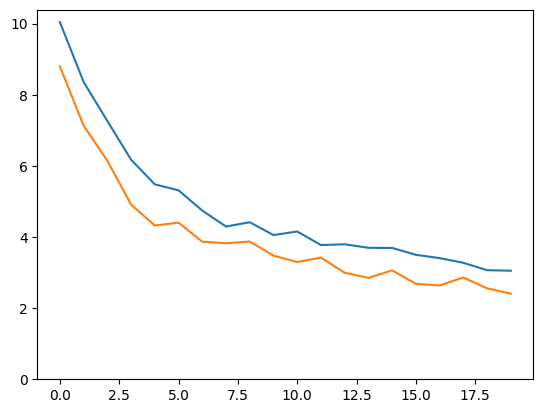

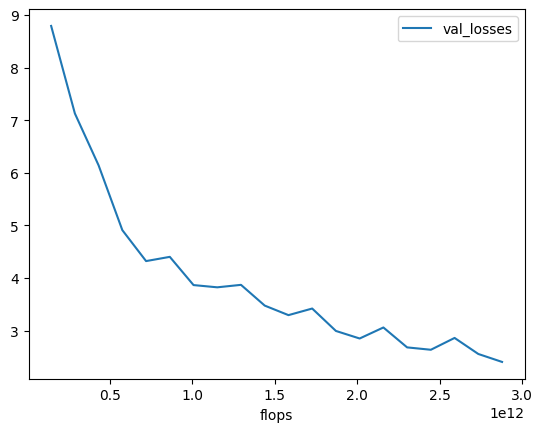

In [27]:
import pandas as pd

df = pd.DataFrame(metrics_basic_Shakespeare)
df['train_losses'].plot(ylim = 0)
df['val_losses'].plot(ylim=0)
df.plot(x = 'flops', y='val_losses')

## Big Model

In [28]:
class BigModel(torch.nn.Module):
    def __init__(self, big=False):
        super(BigModel, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, new_emb_size if big else emb_size)
        self.pe = PositionalEncoding(d_model= new_emb_size if big else emb_size)
        self.block1 = Block(big=big)
        self.block2 = Block(big=big)
        self.block3 = Block(big=big)
        self.block4 = Block(big=big)
        self.block5 = Block(big=big)
        self.block6 = Block(big=big)
        self.block7 = Block(big=big)
        self.block8 = Block(big=big)
        self.f_lin = torch.nn.Linear(new_emb_size if big else emb_size, vocab_size)
        self.drop = torch.nn.Dropout(0.1)
    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        r = self.f_lin(self.drop(m))
        return r

## Fused transformer Architecture

In [29]:
k_params = torch.empty((0,emb_size*emb_size)).to(device)
q_params = torch.empty((0,emb_size*emb_size)).to(device)
v_params = torch.empty((0,emb_size*emb_size)).to(device)
lin_params = torch.empty((0, 2*emb_size*emb_size)).to(device)
ffn_w_params = torch.empty((0, emb_size*emb_size)).to(device)
ffn_b_params = torch.empty((0, emb_size)).to(device)
l_norm_w_params = torch.empty((0, emb_size)).to(device)
l_norm_b_params = torch.empty((0, emb_size)).to(device)
for i in model.state_dict():
    if '.k.' in i:
        k_params = torch.cat((k_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.q.' in i:
        q_params = torch.cat((q_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.v.' in i:
        v_params = torch.cat((v_params, model.state_dict()[i].flatten().view(1,-1)), dim=0)
    elif '.mh_lin' in i:
        lin_params = torch.cat((lin_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'ffn' in i and 'weight' in i:
        ffn_w_params = torch.cat((ffn_w_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'ffn' in i and 'bias' in i:
        ffn_b_params = torch.cat((ffn_b_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'l_norm' in i and 'weight' in i:
        l_norm_w_params = torch.cat((l_norm_w_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)
    elif 'l_norm' in i and 'bias' in i:
        l_norm_b_params = torch.cat((l_norm_b_params, model.state_dict()[i].flatten().view(1,-1)), dim = 0)


In [30]:
class FusedEmbedding(torch.nn.Module):
    def __init__(self, emb_params, static=True, width=False, width_static=True):
        super(FusedEmbedding, self).__init__()
        self.static = static
        self.width_static = width_static
        self.width=width
        if static:
            if width:
                if width_static:
                    self.emb_params = torch.cat((emb_params, emb_params)).view(vocab_size, -1)
                else:
                    self.emb_params = emb_params.view(vocab_size, -1)
                    self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
            else:
                self.emb_params = emb_params.view(vocab_size, -1)
        else:
            self.width = width
            self.emb_params = emb_params
    def forward(self, inp):
        emb = self.emb_params
        if self.static:
            if self.width:
                if self.width_static:
                    return torch.nn.functional.embedding(inp, emb)
                return torch.nn.functional.embedding(inp, self.width_w(emb))
        emb = emb.view(vocab_size, -1)
        return torch.nn.functional.embedding(inp, emb)

In [31]:
class FusedLin(torch.nn.Module):
    def __init__(self, num_layers, in_dim, out_dim, small_params_w, small_params_b = None, static = False, width_static=True, width=False, old_in_dim = emb_size, old_out_dim = emb_size):
        super( FusedLin, self).__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.static = static
        self.width = width
        self.old_in_dim = old_in_dim
        self.old_out_dim = old_out_dim
        self.width_static = width_static
        self.final = True if out_dim == vocab_size else False
        if not self.final and static:
            if width:
                if width_static:
                    self.register_buffer('small_params_w', torch.kron(torch.eye(int(out_dim/old_out_dim), int(in_dim/old_in_dim)).to(device), small_params_w).view(out_dim, in_dim))
                    if small_params_b is not None:
                        if old_out_dim == out_dim:
                            self.register_buffer('small_params_b', small_params_b)
                        else:
                            self.register_buffer('small_params_b', torch.cat((small_params_b, small_params_b)))
                    else:
                        self.small_params_b = None
                else:
                    self.register_buffer('small_params_w', small_params_w)
                    self.width_wa = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width else None
                    self.width_wb = torch.nn.Linear(old_in_dim, in_dim, bias=False) if width else None
                    if small_params_b is not None:
                        self.register_buffer('small_params_b', small_params_b)
                    else:
                        self.small_params_b = None
                    self.width_b = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and small_params_b is not None else None
            else:
                self.register_buffer('small_params_w', small_params_w.view(out_dim, in_dim))
                if small_params_b is not None:
                    self.register_buffer('small_params_b', small_params_b)
                else:
                    self.small_params_b = None
        else:
            self.width_wa = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and not self.final else None
            self.width_wb = torch.nn.Linear(old_in_dim, in_dim, bias=False) if width else None
            self.width_b = torch.nn.Linear(old_out_dim, out_dim, bias=False) if width and small_params_b is not None and not self.final else None
            if not self.final:
                self.lin_w = torch.nn.Parameter(torch.rand(num_layers))
                if small_params_b is not None:
                    self.lin_b = torch.nn.Parameter(torch.rand(num_layers))
            self.register_buffer('small_params_w', small_params_w)
            if small_params_b is not None:
                self.register_buffer('small_params_b', small_params_b)
            else:
                self.small_params_b = None
    def forward(self, inp):
        if self.static and not self.final:
            weight=self.small_params_w
            bias=self.small_params_b
            if not self.width_static:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
                weight = self.width_wa(weight.T).T
                if bias is not None:
                    bias = self.width_b(bias)
            return torch.nn.functional.linear(inp, weight=weight, bias=bias)
        if self.final:
            weight = self.small_params_w
            bias = self.small_params_b
        else:
            weight = self.small_params_w.T @ self.lin_w
            bias = None
            if self.small_params_b is not None:
                bias = self.small_params_b.T@self.lin_b
        if self.width:
            if not self.final:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
                weight = self.width_wa(weight.T).T
            else:
                weight = self.width_wb(weight.view(self.old_out_dim, self.old_in_dim))
        if self.width_b is not None:
            bias = self.width_b(bias)
        weight = weight.view(self.out_dim, self.in_dim)
        return torch.nn.functional.linear(inp, weight, bias = bias)

In [32]:
class FusedNorm(torch.nn.Module):
    def __init__(self, num_layers, small_params_w, small_params_b, static=False, width_static = True, width=False):
        super(FusedNorm, self).__init__()
        self.static = static
        self.width = width
        self.width_static = width_static
        if not static:
            self.register_buffer('small_params_w', small_params_w)
            self.register_buffer('small_params_b', small_params_b)
            self.lin_w = torch.nn.Parameter(torch.randn(num_layers))
            self.lin_b = torch.nn.Parameter(torch.randn(num_layers))
            if width:
                self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
                self.width_b = torch.nn.Linear(emb_size, new_emb_size, bias=False)
        else:
            if width:
                if width_static:
                    self.register_buffer('small_params_w', torch.cat((small_params_w, small_params_w)))
                    self.register_buffer('small_params_b', torch.cat((small_params_b, small_params_b)))
                else:
                    self.register_buffer('small_params_w', small_params_w)
                    self.register_buffer('small_params_b', small_params_b)
                    self.width_w = torch.nn.Linear(emb_size, new_emb_size, bias=False)
                    self.width_b = torch.nn.Linear(emb_size, new_emb_size, bias=False)
            else:
                self.register_buffer('small_params_w', small_params_w)
                self.register_buffer('small_params_b', small_params_b)
    def forward(self, inp):
        if self.static:
            weight = self.small_params_w
            bias = self.small_params_b
            e_s = emb_size if not self.width else new_emb_size
            if not self.width_static:
                weight = self.width_w(weight)
                bias = self.width_b(bias)
            return torch.nn.functional.layer_norm(inp, tuple([e_s]), weight=weight, bias=bias)
        weight = self.small_params_w.T @ self.lin_w
        bias = self.small_params_b.T @ self.lin_b
        if self.width:
            weight = self.width_w(weight)
            bias = self.width_b(bias)
        e_s = emb_size if not self.width else new_emb_size
        return torch.nn.functional.layer_norm(inp, tuple([e_s]), weight=weight, bias=bias)


In [33]:
class FusedAttentionHead(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super( FusedAttentionHead, self).__init__()
        self.static = static
        self.width_static = width_static
        if not static:
            self.k = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, k_params, width=width, width_static=width_static)
            self.q = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, q_params, width=width, width_static=width_static)
            self.v = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, v_params, width=width, width_static=width_static)
        else:
            self.k = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, k_params[layerNum], static=True, width=width, width_static=width_static)
            self.q = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, q_params[layerNum], static=True, width=width, width_static=width_static)
            self.v = FusedLin(num_small_layers*multi_heads, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, v_params[layerNum], static=True, width=width, width_static=width_static)
        self.register_buffer('tril', torch.tril(torch.ones(block_size,block_size)))
    def forward(self, e):
        keys = self.k(e)
        queries = self.q(e)
        values = self.v(e)
        ret = keys @ queries.transpose(1, 2)*(1.0/math.sqrt(keys.size(-1)))
        ret = torch.masked_fill(ret, self.tril==0, -torch.inf)
        ret = torch.softmax(ret, 2)
        ret = ret @ values
        return ret

In [34]:
class FusedMultiHead(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super( FusedMultiHead, self).__init__()
        self.drop = torch.nn.Dropout(0.1)
        self.width_static = width_static
        if not static:
            self.head1 = FusedAttentionHead(width=width, width_static=width_static)
            self.head2 = FusedAttentionHead(width=width, width_static=width_static)
            self.mh_lin = FusedLin(num_small_layers, multi_heads*(emb_size if not width else new_emb_size), emb_size if not width else new_emb_size, lin_params, width=width, old_in_dim=multi_heads*emb_size , old_out_dim=emb_size, width_static=width_static)
        else:
            self.head1 = FusedAttentionHead(static=True, layerNum=2*layerNum, width=width, width_static=width_static)
            self.head2 = FusedAttentionHead(static=True, layerNum=2*layerNum+1, width=width, width_static=width_static)
            self.mh_lin = FusedLin(num_small_layers, multi_heads*(emb_size if not width else new_emb_size), emb_size if not width else new_emb_size, lin_params[layerNum], static=True, width=width, width_static=width_static, old_in_dim=multi_heads*emb_size, old_out_dim=emb_size)
    def forward(self, inp):
        x1 = self.head1(inp)
        x2 = self.head2(inp)
        return self.mh_lin(self.drop(torch.cat([x1,x2], dim=2))).relu()

In [35]:
class FusedBlock(torch.nn.Module):
    def __init__(self, static=False, layerNum=None, width=False, width_static = True):
        super(FusedBlock, self).__init__()
        self.static = static
        self.width_static = width_static
        self.drop = torch.nn.Dropout(0.1)
        if not static:
            self.multiHead = FusedMultiHead(width=width, width_static=width_static)
            self.norm_1 = FusedNorm(num_small_layers*2, l_norm_w_params, l_norm_b_params, width=width, width_static=width_static)
            self.norm_2 = FusedNorm(num_small_layers*2, l_norm_w_params, l_norm_b_params, width=width, width_static=width_static)
            self.ffn = FusedLin(num_small_layers, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, ffn_w_params, ffn_b_params, width=width, width_static=width_static)
        else:
            self.multiHead = FusedMultiHead(static=True, layerNum=layerNum, width=width, width_static=width_static)
            self.norm_1 = FusedNorm(num_small_layers*2, l_norm_w_params[layerNum*2], l_norm_b_params[layerNum*2], static=True, width=width, width_static=width_static)
            self.norm_2 = FusedNorm(num_small_layers*2, l_norm_w_params[layerNum*2+1], l_norm_b_params[layerNum*2+1], static=True, width=width, width_static=width_static)
            self.ffn = FusedLin(num_small_layers, emb_size if not width else new_emb_size, emb_size if not width else new_emb_size, ffn_w_params[layerNum], ffn_b_params[layerNum], static=True, width=width, width_static=width_static)
    def forward(self, inp):
        m = self.norm_1(inp + self.multiHead(inp))
        m = self.norm_2(m + self.ffn(self.drop(m)).relu())
        return m


## LiGO & CrossLiGO

In [36]:
class StackLiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(StackLiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width)
        self.block2 = FusedBlock(static=True, layerNum=1, width=width)
        self.block3 = FusedBlock(static=True, layerNum=2, width=width)
        self.block4 = FusedBlock(static=True, layerNum=3, width=width)
        self.block5 = FusedBlock(width=width)
        self.block6 = FusedBlock(width=width)
        self.block7 = FusedBlock(width=width)
        self.block8 = FusedBlock(width=width)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [37]:
class StackLiGOv2(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(StackLiGOv2, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width, width_static=False)
        self.block2 = FusedBlock(static=True, layerNum=1, width=width, width_static=False)
        self.block3 = FusedBlock(static=True, layerNum=2, width=width, width_static=False)
        self.block4 = FusedBlock(static=True, layerNum=3, width=width, width_static=False)
        self.block5 = FusedBlock(width=width)
        self.block6 = FusedBlock(width=width)
        self.block7 = FusedBlock(width=width)
        self.block8 = FusedBlock(width=width)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [38]:
class LiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(LiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(width=width, width_static=False)
        self.block2 = FusedBlock(width=width, width_static=False)
        self.block3 = FusedBlock(width=width, width_static=False)
        self.block4 = FusedBlock(width=width, width_static=False)
        self.block5 = FusedBlock(width=width, width_static=False)
        self.block6 = FusedBlock(width=width, width_static=False)
        self.block7 = FusedBlock(width=width, width_static=False)
        self.block8 = FusedBlock(width=width, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone(), small_params_b=model.f_lin.bias.clone(), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))

In [39]:
class CrossLiGO(torch.nn.Module):
    def __init__(self, width=False) -> None:
        super(CrossLiGO, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten().detach().clone(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(static=True, layerNum=0, width=width)
        self.block3 = FusedBlock(static=True, layerNum=1, width=width)
        self.block5 = FusedBlock(static=True, layerNum=2, width=width)
        self.block7 = FusedBlock(static=True, layerNum=3, width=width)
        self.block2 = FusedBlock(width=width, width_static=False)
        self.block4 = FusedBlock(width=width, width_static=False)
        self.block6 = FusedBlock(width=width, width_static=False)
        self.block8 = FusedBlock(width=width, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten().clone().to(device), small_params_b=model.f_lin.bias.detach().clone().to(device), width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        m = self.block5(m)
        m = self.block6(m)
        m = self.block7(m)
        m = self.block8(m)
        return self.f_lin(self.drop(m))


In [40]:
class LiGO_W(torch.nn.Module):
    def __init__(self, width=True) -> None:
        super(LiGO_W, self).__init__()
        self.emb = FusedEmbedding(emb_params=model.embedding.weight.flatten(), width=width, static=True, width_static=False)
        self.pe = PositionalEncoding(d_model=new_emb_size if width else emb_size)
        self.block1 = FusedBlock(width=width, static=True, layerNum=0, width_static=False)
        self.block2 = FusedBlock(width=width, static=True, layerNum=1, width_static=False)
        self.block3 = FusedBlock(width=width, static=True, layerNum=2, width_static=False)
        self.block4 = FusedBlock(width=width, static=True, layerNum=3, width_static=False)
        self.drop = torch.nn.Dropout(0.1)
        self.f_lin = FusedLin(1, in_dim=emb_size if not width else new_emb_size, out_dim=vocab_size, static=True, small_params_w= model.f_lin.weight.flatten(), small_params_b=model.f_lin.bias, width=width, old_in_dim=emb_size, old_out_dim=vocab_size)
    def forward(self, inp):
        e = self.emb(inp)
        e = self.pe(e)
        m = self.block1(e)
        m = self.block2(m)
        m = self.block3(m)
        m = self.block4(m)
        return self.f_lin(self.drop(m))


In [41]:
@torch.no_grad()
def initLiGO(stackLiGO, bigModel):
    # Embedding layer
    emb = stackLiGO.emb.emb_params
    if stackLiGO.emb.width and not stackLiGO.emb.width_static:
        emb = stackLiGO.emb.width_w(emb)
    setattr(bigModel.embedding, 'weight', torch.nn.Parameter(emb, requires_grad=True).to(device))
    # Final Linear layer
    f_lin_w = stackLiGO.f_lin.small_params_w.view(vocab_size, -1)
    f_lin_b = stackLiGO.f_lin.small_params_b
    if stackLiGO.f_lin.width:
        f_lin_w = (stackLiGO.f_lin.width_wb(f_lin_w))
        # f_lin_w = (stackLiGO.f_lin.width_wa(f_lin_w.T)).T     Issues with big vocab size
        # f_lin_b = stackLiGO.f_lin.width_b.weight@f_lin_b
    setattr(bigModel.f_lin, 'weight', torch.nn.Parameter(f_lin_w.view(vocab_size, -1), requires_grad=True).to(device))
    setattr(bigModel.f_lin, 'bias', torch.nn.Parameter(f_lin_b, requires_grad=True).to(device))
    num_layers = num_large_layers if type(stackLiGO) is not LiGO_W else num_small_layers
    for i in range(1, num_layers+1):
        fused_block = getattr(stackLiGO, f'block{i}')
        big_block = getattr(bigModel, f'block{i}')
        # Setting FFN Weights
        if fused_block.ffn.static:
            if fused_block.ffn.width:
                if fused_block.ffn.width_static:
                    fb_w = fused_block.ffn.small_params_w.view(new_emb_size, new_emb_size)
                    fb_b = fused_block.ffn.small_params_b
                else:
                    fb_w = fused_block.ffn.small_params_w.view(emb_size, emb_size)
                    fb_b = fused_block.ffn.small_params_b
                    fb_w = fused_block.ffn.width_wb(fb_w)
                    fb_w = fused_block.ffn.width_wa(fb_w.T).T
                    fb_b = fused_block.ffn.width_b.weight@fb_b
            else:
                fb_w = fused_block.ffn.small_params_w.view(emb_size, emb_size)
                fb_b = fused_block.ffn.small_params_b
        else:
            fb_w = (ffn_w_params.T@fused_block.ffn.lin_w).view(emb_size, emb_size)
            fb_b = (ffn_b_params.T@fused_block.ffn.lin_b)
            if fused_block.ffn.width:
                fb_w = fused_block.ffn.width_wb(fb_w)
                fb_w = fused_block.ffn.width_wa(fb_w.T).T
                fb_b = fused_block.ffn.width_b.weight@fb_b
        setattr(big_block.ffn, 'weight', torch.nn.Parameter(fb_w, requires_grad=True).to(device))
        setattr(big_block.ffn, 'bias', torch.nn.Parameter(fb_b, requires_grad=True).to(device))
        # Setting Norm Layers
        if fused_block.static:
            n_w_1 = fused_block.norm_1.small_params_w
            n_b_1 = fused_block.norm_1.small_params_b
            n_w_2 = fused_block.norm_2.small_params_w
            n_b_2 = fused_block.norm_2.small_params_b
            if not fused_block.width_static:
                n_w_1 = fused_block.norm_1.width_w.weight@n_w_1
                n_b_1 = fused_block.norm_1.width_b.weight@n_b_1
                n_w_2 = fused_block.norm_2.width_w.weight@n_w_2
                n_b_2 = fused_block.norm_2.width_b.weight@n_b_2
        else:
            n_w_1 = (l_norm_w_params.T@fused_block.norm_1.lin_w)
            n_b_1 = (l_norm_b_params.T@fused_block.norm_1.lin_b)
            n_w_2 = (l_norm_w_params.T@fused_block.norm_2.lin_w)
            n_b_2 = (l_norm_b_params.T@fused_block.norm_2.lin_b)
            if fused_block.norm_1.width:
                n_w_1 = fused_block.norm_1.width_w.weight@n_w_1
                n_b_1 = fused_block.norm_1.width_b.weight@n_b_1
                n_w_2 = fused_block.norm_2.width_w.weight@n_w_2
                n_b_2 = fused_block.norm_2.width_b.weight@n_b_2
        setattr(big_block.l_norm_1, 'weight', torch.nn.Parameter(n_w_1, requires_grad=True).to(device))
        setattr(big_block.l_norm_1, 'bias', torch.nn.Parameter(n_b_1, requires_grad=True).to(device))
        setattr(big_block.l_norm_2, 'weight', torch.nn.Parameter(n_w_2, requires_grad=True).to(device))
        setattr(big_block.l_norm_2, 'bias', torch.nn.Parameter(n_b_2, requires_grad=True).to(device))
        # Setting Multi-Head Attention
        if fused_block.static:
            mh = fused_block.multiHead.mh_lin.small_params_w
            if not fused_block.width_static:
                mh = fused_block.multiHead.mh_lin.width_wb(mh.view(emb_size, multi_heads*emb_size))
                mh = fused_block.multiHead.mh_lin.width_wa(mh.T).T
        else:
            mh = (lin_params.T@fused_block.multiHead.mh_lin.lin_w).view(emb_size, emb_size*multi_heads)
            if fused_block.multiHead.mh_lin.width:
                mh = fused_block.multiHead.mh_lin.width_wb(mh)
                mh = fused_block.multiHead.mh_lin.width_wa(mh.T).T
        setattr(big_block.multihead.mh_lin, 'weight', torch.nn.Parameter(mh, requires_grad=True))
        for h in range(1, multi_heads+1):
            head = getattr(big_block.multihead, f'head{h}')
            fused_head = getattr(fused_block.multiHead, f'head{h}')
            if fused_head.static:
                k = fused_head.k.small_params_w
                q = fused_head.q.small_params_w
                v = fused_head.v.small_params_w
                if not fused_block.width_static:
                    k = fused_head.k.width_wb(k.view(emb_size, emb_size))
                    k = fused_head.k.width_wa(k.T).T
                    q = fused_head.q.width_wb(q.view(emb_size, emb_size))
                    q = fused_head.q.width_wa(q.T).T
                    v = fused_head.v.width_wb(v.view(emb_size, emb_size))
                    v = fused_head.v.width_wa(v.T).T
            else:
                k = (k_params.T@fused_head.k.lin_w).view(emb_size, emb_size)
                q = (q_params.T@fused_head.q.lin_w).view(emb_size, emb_size)
                v = (v_params.T@fused_head.v.lin_w).view(emb_size, emb_size)
                if fused_head.k.width:
                    k = fused_head.k.width_wb(k)
                    k = fused_head.k.width_wa(k.T).T
                    q = fused_head.q.width_wb(q)
                    q = fused_head.q.width_wa(q.T).T
                    v = fused_head.v.width_wb(v)
                    v = fused_head.v.width_wa(v.T).T
            setattr(head.k, 'weight', torch.nn.Parameter(k, requires_grad=True).to(device))
            setattr(head.q, 'weight', torch.nn.Parameter(q, requires_grad=True).to(device))
            setattr(head.v, 'weight', torch.nn.Parameter(v, requires_grad=True).to(device))

## Comparative study models

### Scratch

In [42]:
bigModel_scratch = BigModel(big=True).to(device)
optim_sb = torch.optim.Adam(params=bigModel_scratch.parameters(), lr=1e-3)
scratch_depth_width = train(bigModel_scratch, optim_sb, 20)

Epoch 1, Train Loss: 8.7846, Val Loss: 6.0660
Epoch 2, Train Loss: 6.2521, Val Loss: 5.0433
Epoch 3, Train Loss: 5.1021, Val Loss: 3.8542
Epoch 4, Train Loss: 4.8370, Val Loss: 3.6847
Epoch 5, Train Loss: 4.2630, Val Loss: 3.7815
Epoch 6, Train Loss: 3.9466, Val Loss: 3.2120
Epoch 7, Train Loss: 3.8787, Val Loss: 2.6633
Epoch 8, Train Loss: 3.4371, Val Loss: 3.0911
Epoch 9, Train Loss: 3.2541, Val Loss: 2.7648
Epoch 10, Train Loss: 3.1509, Val Loss: 2.6276
Epoch 11, Train Loss: 2.9613, Val Loss: 2.3860
Epoch 12, Train Loss: 2.7200, Val Loss: 2.4963
Epoch 13, Train Loss: 2.5773, Val Loss: 2.1954
Epoch 14, Train Loss: 2.4494, Val Loss: 2.1306
Epoch 15, Train Loss: 2.2806, Val Loss: 2.0683
Epoch 16, Train Loss: 2.4489, Val Loss: 1.8231
Epoch 17, Train Loss: 2.2636, Val Loss: 2.0644
Epoch 18, Train Loss: 1.9663, Val Loss: 2.3295
Epoch 19, Train Loss: 2.0619, Val Loss: 2.0081
Epoch 20, Train Loss: 1.8621, Val Loss: 1.6490


<Axes: >

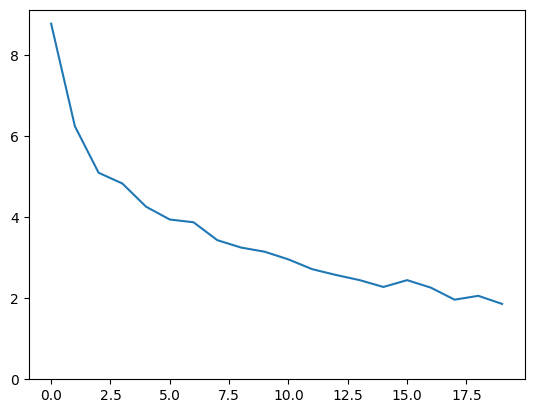

In [43]:
big_model_metrics = pd.DataFrame(scratch_depth_width)
big_model_metrics['train_losses'].plot(ylim = 0)

## Stacking

In [44]:
import torch.nn as nn

class StackedModel(nn.Module):
    def __init__(self, pretrained_model):
        super(StackedModel, self).__init__()

        # Use pretrained model's components
        self.embedding = pretrained_model.embedding
        self.pe = pretrained_model.pe
        self.f_lin = pretrained_model.f_lin
        self.drop = pretrained_model.drop

        # Add pretrained blocks (1-4)
        self.blocks = nn.ModuleList(pretrained_model.blocks)

        # Add additional blocks according to the pattern: 5-1, 6-2, 7-3, 8-4
        # Block 5 -> Block 1, Block 6 -> Block 2, Block 7 -> Block 3, Block 8 -> Block 4
        self.blocks.append(pretrained_model.blocks[0])  # Block 5
        self.blocks.append(pretrained_model.blocks[1])  # Block 6
        self.blocks.append(pretrained_model.blocks[2])  # Block 7
        self.blocks.append(pretrained_model.blocks[3])  # Block 8

    def forward(self, inp):
        e = self.embedding(inp)
        e = self.pe(e)

        # Pass input through all blocks sequentially
        for block in self.blocks:
            e = block(e)

        r = self.f_lin(self.drop(e))
        return r

In [45]:
stacked_model = StackedModel(model)
optim_stacked = torch.optim.Adam(params=stacked_model.parameters(), lr=1e-2)
stacked_metrics = train(stacked_model, optim_stacked, 20)

Epoch 1, Train Loss: 7.8234, Val Loss: 8.3943
Epoch 2, Train Loss: 8.0219, Val Loss: 7.2703
Epoch 3, Train Loss: 7.7309, Val Loss: 7.1475
Epoch 4, Train Loss: 7.4849, Val Loss: 6.9879
Epoch 5, Train Loss: 7.5170, Val Loss: 6.8653
Epoch 6, Train Loss: 7.3807, Val Loss: 6.9581
Epoch 7, Train Loss: 7.3981, Val Loss: 6.6866
Epoch 8, Train Loss: 7.2594, Val Loss: 6.5908
Epoch 9, Train Loss: 7.2380, Val Loss: 7.0345
Epoch 10, Train Loss: 7.2420, Val Loss: 6.5082
Epoch 11, Train Loss: 7.2294, Val Loss: 6.7608
Epoch 12, Train Loss: 7.1181, Val Loss: 6.6894
Epoch 13, Train Loss: 7.2280, Val Loss: 7.0835
Epoch 14, Train Loss: 7.0361, Val Loss: 6.5143
Epoch 15, Train Loss: 7.1767, Val Loss: 6.9420
Epoch 16, Train Loss: 7.0330, Val Loss: 6.5281
Epoch 17, Train Loss: 7.2304, Val Loss: 6.5042
Epoch 18, Train Loss: 7.1268, Val Loss: 6.8843
Epoch 19, Train Loss: 6.9722, Val Loss: 6.5666
Epoch 20, Train Loss: 7.0954, Val Loss: 6.3824


### LiGO Depth only

In [46]:
LiGO_d = LiGO(width=False).to(device)
optim_ld = torch.optim.Adam(params=LiGO_d.parameters(), lr=1e-2)
_=train(LiGO_d, optim_ld, 20)

Epoch 1, Train Loss: 9.7245, Val Loss: 7.7885
Epoch 2, Train Loss: 7.0293, Val Loss: 5.8512
Epoch 3, Train Loss: 5.9927, Val Loss: 4.4105
Epoch 4, Train Loss: 4.9753, Val Loss: 3.8258
Epoch 5, Train Loss: 4.3296, Val Loss: 3.8957
Epoch 6, Train Loss: 4.2322, Val Loss: 3.2468
Epoch 7, Train Loss: 4.0420, Val Loss: 3.3668
Epoch 8, Train Loss: 4.0408, Val Loss: 3.5380
Epoch 9, Train Loss: 3.8821, Val Loss: 3.4500
Epoch 10, Train Loss: 3.9997, Val Loss: 3.3101
Epoch 11, Train Loss: 3.8242, Val Loss: 3.2069
Epoch 12, Train Loss: 3.8928, Val Loss: 3.3128
Epoch 13, Train Loss: 3.8724, Val Loss: 3.0957
Epoch 14, Train Loss: 3.6800, Val Loss: 3.4668
Epoch 15, Train Loss: 3.7895, Val Loss: 3.1125
Epoch 16, Train Loss: 3.8645, Val Loss: 3.1768
Epoch 17, Train Loss: 3.6572, Val Loss: 3.0797
Epoch 18, Train Loss: 3.7994, Val Loss: 3.0421
Epoch 19, Train Loss: 3.7608, Val Loss: 3.0850
Epoch 20, Train Loss: 3.6984, Val Loss: 3.2304


In [47]:
bigModel = BigModel(big=False).to(device)
initLiGO(LiGO_d, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
ligo_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 3.6062, Val Loss: 2.8840
Epoch 2, Train Loss: 3.3684, Val Loss: 2.9467
Epoch 3, Train Loss: 3.2358, Val Loss: 2.4861
Epoch 4, Train Loss: 3.1001, Val Loss: 2.6680
Epoch 5, Train Loss: 3.0763, Val Loss: 2.4367
Epoch 6, Train Loss: 2.9389, Val Loss: 2.3930
Epoch 7, Train Loss: 2.8929, Val Loss: 2.2800
Epoch 8, Train Loss: 2.6339, Val Loss: 2.4221
Epoch 9, Train Loss: 2.6542, Val Loss: 1.9845
Epoch 10, Train Loss: 2.6838, Val Loss: 2.4002
Epoch 11, Train Loss: 2.6374, Val Loss: 2.1641
Epoch 12, Train Loss: 2.4944, Val Loss: 2.0805
Epoch 13, Train Loss: 2.3946, Val Loss: 1.9979
Epoch 14, Train Loss: 2.4891, Val Loss: 1.8436
Epoch 15, Train Loss: 2.3984, Val Loss: 2.2975
Epoch 16, Train Loss: 2.2512, Val Loss: 1.7867
Epoch 17, Train Loss: 2.2742, Val Loss: 1.8130
Epoch 18, Train Loss: 2.0024, Val Loss: 1.5787
Epoch 19, Train Loss: 2.1390, Val Loss: 1.6163
Epoch 20, Train Loss: 2.1259, Val Loss: 1.8002


### CrossLiGO depth only

In [48]:
cl_d = CrossLiGO(width=False).to(device)
optim_ldw = torch.optim.Adam(cl_d.parameters(), lr=1e-2)
_=train(cl_d, optim_ldw, 20)

Epoch 1, Train Loss: 6.1967, Val Loss: 4.6221
Epoch 2, Train Loss: 5.0099, Val Loss: 4.2631
Epoch 3, Train Loss: 4.6053, Val Loss: 3.9001
Epoch 4, Train Loss: 4.4392, Val Loss: 3.8501
Epoch 5, Train Loss: 4.3002, Val Loss: 3.5939
Epoch 6, Train Loss: 4.1157, Val Loss: 3.6792
Epoch 7, Train Loss: 4.1722, Val Loss: 3.2779
Epoch 8, Train Loss: 4.0179, Val Loss: 3.4030
Epoch 9, Train Loss: 4.0667, Val Loss: 3.5076
Epoch 10, Train Loss: 4.0392, Val Loss: 3.6859
Epoch 11, Train Loss: 4.0351, Val Loss: 3.1144
Epoch 12, Train Loss: 4.1487, Val Loss: 2.8386
Epoch 13, Train Loss: 3.9938, Val Loss: 3.5360
Epoch 14, Train Loss: 3.8145, Val Loss: 3.4195
Epoch 15, Train Loss: 4.0540, Val Loss: 3.4656
Epoch 16, Train Loss: 3.8588, Val Loss: 3.2009
Epoch 17, Train Loss: 3.9534, Val Loss: 3.0682
Epoch 18, Train Loss: 3.9772, Val Loss: 3.3196
Epoch 19, Train Loss: 4.0877, Val Loss: 3.4320
Epoch 20, Train Loss: 3.8704, Val Loss: 3.3178


In [49]:
bigModel = BigModel(big=False).to(device)
initLiGO(cl_d, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
cl_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 3.6984, Val Loss: 2.7956
Epoch 2, Train Loss: 3.4440, Val Loss: 2.9036
Epoch 3, Train Loss: 3.2521, Val Loss: 2.7705
Epoch 4, Train Loss: 3.1922, Val Loss: 2.7204
Epoch 5, Train Loss: 3.0180, Val Loss: 2.7755
Epoch 6, Train Loss: 2.9173, Val Loss: 2.3931
Epoch 7, Train Loss: 3.0329, Val Loss: 2.2877
Epoch 8, Train Loss: 2.8169, Val Loss: 2.0727
Epoch 9, Train Loss: 2.7235, Val Loss: 2.6414
Epoch 10, Train Loss: 2.7230, Val Loss: 2.5910
Epoch 11, Train Loss: 2.6944, Val Loss: 2.5272
Epoch 12, Train Loss: 2.4398, Val Loss: 2.1493
Epoch 13, Train Loss: 2.4698, Val Loss: 2.0573
Epoch 14, Train Loss: 2.3590, Val Loss: 2.1285
Epoch 15, Train Loss: 2.3522, Val Loss: 2.0049
Epoch 16, Train Loss: 2.3784, Val Loss: 2.0923
Epoch 17, Train Loss: 2.3069, Val Loss: 1.9444
Epoch 18, Train Loss: 2.1174, Val Loss: 2.0668
Epoch 19, Train Loss: 2.2055, Val Loss: 1.5413
Epoch 20, Train Loss: 2.1791, Val Loss: 1.7166


### StackLiGO depth only

In [50]:
stackLiGOd = StackLiGO(width=False).to(device)
optim_sld = torch.optim.Adam(params=stackLiGOd.parameters(), lr=1e-2)
_=train(stackLiGOd, optim_sld, 20)

Epoch 1, Train Loss: 6.6375, Val Loss: 4.8096
Epoch 2, Train Loss: 4.8039, Val Loss: 3.7941
Epoch 3, Train Loss: 4.0052, Val Loss: 3.1946
Epoch 4, Train Loss: 3.7090, Val Loss: 2.9759
Epoch 5, Train Loss: 3.3553, Val Loss: 3.1058
Epoch 6, Train Loss: 3.2098, Val Loss: 3.0017
Epoch 7, Train Loss: 3.2938, Val Loss: 2.6646
Epoch 8, Train Loss: 3.3933, Val Loss: 2.9601
Epoch 9, Train Loss: 3.1336, Val Loss: 2.7342
Epoch 10, Train Loss: 3.3487, Val Loss: 2.9229
Epoch 11, Train Loss: 3.1892, Val Loss: 2.4386
Epoch 12, Train Loss: 3.0805, Val Loss: 2.6827
Epoch 13, Train Loss: 3.2152, Val Loss: 2.7675
Epoch 14, Train Loss: 3.1637, Val Loss: 3.3422
Epoch 15, Train Loss: 3.2780, Val Loss: 2.6812
Epoch 16, Train Loss: 3.2617, Val Loss: 2.8438
Epoch 17, Train Loss: 3.1397, Val Loss: 2.8198
Epoch 18, Train Loss: 3.1839, Val Loss: 2.9613
Epoch 19, Train Loss: 3.3404, Val Loss: 2.6157
Epoch 20, Train Loss: 3.2505, Val Loss: 2.7364


In [51]:
bigModel = BigModel(big=False).to(device)
initLiGO(stackLiGOd, bigModel)
optim_b = torch.optim.Adam(params=bigModel.parameters(), lr=1e-3)
sl_depth_metrics = train(bigModel, optim_b, 20)

Epoch 1, Train Loss: 3.2909, Val Loss: 2.6785
Epoch 2, Train Loss: 3.0471, Val Loss: 2.4018
Epoch 3, Train Loss: 2.9266, Val Loss: 2.1886
Epoch 4, Train Loss: 2.7218, Val Loss: 2.2731
Epoch 5, Train Loss: 2.6414, Val Loss: 2.4968
Epoch 6, Train Loss: 2.7630, Val Loss: 2.5366
Epoch 7, Train Loss: 2.6984, Val Loss: 2.1424
Epoch 8, Train Loss: 2.3973, Val Loss: 2.2057
Epoch 9, Train Loss: 2.3769, Val Loss: 2.2267
Epoch 10, Train Loss: 2.5915, Val Loss: 1.9228
Epoch 11, Train Loss: 2.3689, Val Loss: 2.0587
Epoch 12, Train Loss: 2.4158, Val Loss: 2.0990
Epoch 13, Train Loss: 2.2372, Val Loss: 1.9870
Epoch 14, Train Loss: 2.0625, Val Loss: 1.6719
Epoch 15, Train Loss: 2.1172, Val Loss: 1.8129
Epoch 16, Train Loss: 1.8772, Val Loss: 1.9168
Epoch 17, Train Loss: 2.0187, Val Loss: 1.8204
Epoch 18, Train Loss: 1.9520, Val Loss: 1.6125
Epoch 19, Train Loss: 1.9677, Val Loss: 1.7355
Epoch 20, Train Loss: 1.7724, Val Loss: 1.7684


# When to grow

## Periodic

0 -> 8

pretrained(4) -> 8

In [52]:
base_model = model.to(device)
periodic_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_pretrained_periodic = periodic_train(base_model, periodic_optimizer, 20, num_blocks=4)

Epoch 1, Train Loss: 7.1155, Val Loss: 6.5773
Epoch 2, Train Loss: 6.9215, Val Loss: 6.5980
Epoch 3, Train Loss: 7.1897, Val Loss: 6.7424
Epoch 4, Train Loss: 7.2672, Val Loss: 6.4901
Adding new block at epoch 4
added successfully
Epoch 5, Train Loss: 10.3050, Val Loss: 7.4602
Epoch 6, Train Loss: 7.6244, Val Loss: 6.8751
Epoch 7, Train Loss: 7.3180, Val Loss: 6.9483
Epoch 8, Train Loss: 7.1658, Val Loss: 6.7294
Adding new block at epoch 8
added successfully
Epoch 9, Train Loss: 7.4621, Val Loss: 7.0697
Epoch 10, Train Loss: 7.3936, Val Loss: 6.9352
Epoch 11, Train Loss: 7.1601, Val Loss: 6.4107
Epoch 12, Train Loss: 7.2140, Val Loss: 6.8759
Adding new block at epoch 12
added successfully
Epoch 13, Train Loss: 7.5105, Val Loss: 6.8601
Epoch 14, Train Loss: 7.0694, Val Loss: 6.0930
Epoch 15, Train Loss: 6.9821, Val Loss: 6.7413
Epoch 16, Train Loss: 7.2136, Val Loss: 6.8212
Adding new block at epoch 16
added successfully
Epoch 17, Train Loss: 7.4583, Val Loss: 6.0744
Epoch 18, Train Los

<Axes: >

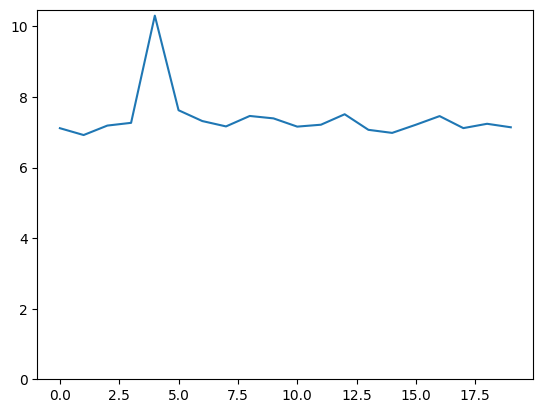

In [53]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_periodic)
df['train_losses'].plot(ylim = 0)

In [54]:
base_model = Model(1)
periodic_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_periodic = periodic_train(base_model, periodic_optimizer, 20, num_blocks = 8)

Epoch 1, Train Loss: 10.3322, Val Loss: 9.2484
Epoch 2, Train Loss: 8.9587, Val Loss: 7.8332
Adding new block at epoch 2
added successfully
Epoch 3, Train Loss: 7.7668, Val Loss: 6.6761
Epoch 4, Train Loss: 6.7410, Val Loss: 5.7509
Adding new block at epoch 4
added successfully
Epoch 5, Train Loss: 6.1483, Val Loss: 4.7922
Epoch 6, Train Loss: 5.5132, Val Loss: 4.6880
Adding new block at epoch 6
added successfully
Epoch 7, Train Loss: 5.2872, Val Loss: 4.4564
Epoch 8, Train Loss: 4.8773, Val Loss: 4.2833
Adding new block at epoch 8
added successfully
Epoch 9, Train Loss: 4.7083, Val Loss: 4.0519
Epoch 10, Train Loss: 4.4835, Val Loss: 4.0844
Adding new block at epoch 10
added successfully
Epoch 11, Train Loss: 4.4598, Val Loss: 3.2922
Epoch 12, Train Loss: 4.2827, Val Loss: 3.5177
Adding new block at epoch 12
added successfully
Epoch 13, Train Loss: 4.0971, Val Loss: 3.5451
Epoch 14, Train Loss: 3.8033, Val Loss: 3.6245
Adding new block at epoch 14
added successfully
Epoch 15, Train Lo

<Axes: >

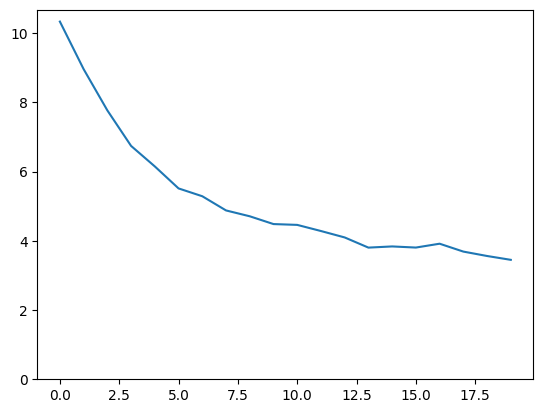

In [55]:
import pandas as pd

df = pd.DataFrame(metrics_basic_periodic)
df['train_losses'].plot(ylim = 0)

## Convergence Growth

In [56]:
base_model = Model(1).to(device)
convergence_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_convergence = convergence_train(base_model, convergence_optimizer, 20, num_blocks = 8, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002)

Epoch 1, Train Loss: 10.4581, Val Loss: 9.3644
Epoch 2, Train Loss: 9.1897, Val Loss: 8.0534
Forcing block addition at epoch 2 due to period interval.
Added successfully
Epoch 3, Train Loss: 7.7844, Val Loss: 6.7385
Epoch 4, Train Loss: 6.8242, Val Loss: 5.4697
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 5, Train Loss: 6.0175, Val Loss: 5.1794
Epoch 6, Train Loss: 5.2847, Val Loss: 4.8846
Forcing block addition at epoch 6 due to period interval.
Added successfully
Epoch 7, Train Loss: 5.3348, Val Loss: 4.4566
Epoch 8, Train Loss: 5.1249, Val Loss: 4.3204
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 9, Train Loss: 4.8396, Val Loss: 3.8172
Epoch 10, Train Loss: 4.4307, Val Loss: 3.5359
Forcing block addition at epoch 10 due to period interval.
Added successfully
Epoch 11, Train Loss: 4.3810, Val Loss: 3.7383
Epoch 12, Train Loss: 4.1778, Val Loss: 3.5474
Forcing block addition at epoch 12 due to period interval.

<Axes: >

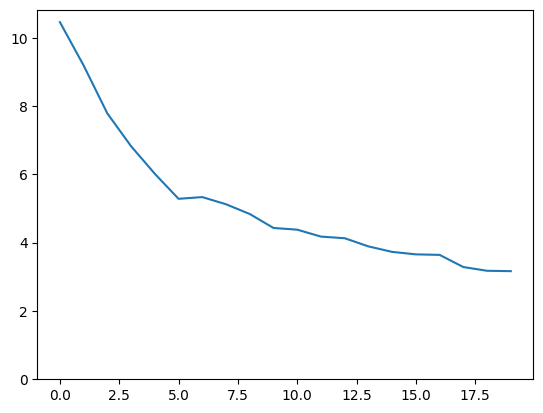

In [57]:
import pandas as pd

df = pd.DataFrame(metrics_basic_convergence)
df['train_losses'].plot(ylim = 0)

In [58]:
base_model = model.to(device)
convergence_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_pretrained_convergence = convergence_train(base_model, convergence_optimizer, 20, num_blocks = 4, patience=5, threshold=1e-3, moving_avg_window=5, stability_threshold=0.002)

Epoch 1, Train Loss: 7.1414, Val Loss: 6.6880
Epoch 2, Train Loss: 7.0989, Val Loss: 6.6116
Epoch 3, Train Loss: 7.1701, Val Loss: 6.6136
Epoch 4, Train Loss: 7.1168, Val Loss: 6.8815
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 5, Train Loss: 7.4340, Val Loss: 6.7216
Epoch 6, Train Loss: 7.2334, Val Loss: 6.8297
Epoch 7, Train Loss: 7.2902, Val Loss: 6.4751
Epoch 8, Train Loss: 7.1464, Val Loss: 6.7114
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 9, Train Loss: 7.2257, Val Loss: 6.6744
Epoch 10, Train Loss: 7.0462, Val Loss: 6.4838
Epoch 11, Train Loss: 7.2330, Val Loss: 6.8773
Stable loss detected at epoch 11, adding block.
Added successfully
Epoch 12, Train Loss: 7.4849, Val Loss: 6.7896
Epoch 13, Train Loss: 7.1020, Val Loss: 6.5418
Epoch 14, Train Loss: 7.0415, Val Loss: 6.9146
Epoch 15, Train Loss: 7.0299, Val Loss: 6.8786
Epoch 16, Train Loss: 7.1997, Val Loss: 6.7325
Forcing block addition at epoch 16 d

<Axes: >

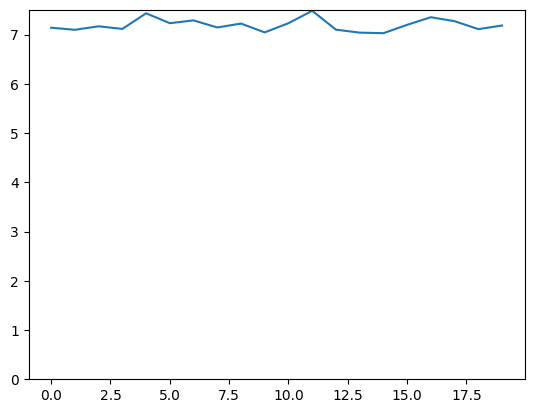

In [59]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_convergence)
df['train_losses'].plot(ylim = 0)

## FRAWGrow

In [60]:
# 0 -> 8
base_model = Model(1).to(device)
fragrow_optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-3)
metrics_basic_frawgrow = FRAWGrow_train(base_model, fragrow_optimizer, epochs=20, num_blocks=4, alpha=4.0, min_fine_tuning_epochs=100)

Epoch 1, Train Loss: 10.5217, Val Loss: 9.7028
Epoch 2, Train Loss: 9.1972, Val Loss: 8.0005
Epoch 3, Train Loss: 7.9505, Val Loss: 6.9851
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 4, Train Loss: 6.9393, Val Loss: 5.4549
Epoch 5, Train Loss: 6.2193, Val Loss: 5.1741
Epoch 6, Train Loss: 5.6464, Val Loss: 4.5142
Epoch 7, Train Loss: 5.1152, Val Loss: 4.1067
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 8, Train Loss: 4.8285, Val Loss: 4.1473
Epoch 9, Train Loss: 4.9237, Val Loss: 4.2203
Epoch 10, Train Loss: 4.6071, Val Loss: 3.6334
Epoch 11, Train Loss: 4.3373, Val Loss: 3.5226
Forcing block addition at epoch 12 due to period interval.
Added successfully
Epoch 12, Train Loss: 4.1912, Val Loss: 3.6397
Epoch 13, Train Loss: 4.3366, Val Loss: 3.3047
Epoch 14, Train Loss: 3.9909, Val Loss: 3.1143
Epoch 15, Train Loss: 3.6897, Val Loss: 3.0483
Forcing block addition at epoch 16 due to period interval.
Added succes

<Axes: >

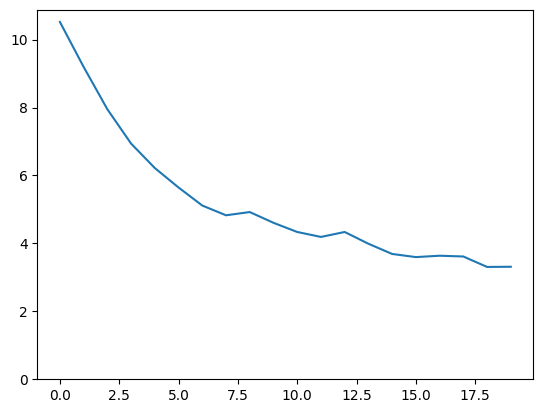

In [61]:
import pandas as pd

df = pd.DataFrame(metrics_basic_frawgrow)
df['train_losses'].plot(ylim = 0)

In [62]:
# 4 -> 8
base_model = model.to(device)
fragrow_optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
metrics_pretrained_frawgrow = FRAWGrow_train(base_model, fragrow_optimizer, epochs=20, num_blocks=4, alpha=4.0, min_fine_tuning_epochs=100)

Epoch 1, Train Loss: 7.2543, Val Loss: 6.7202
Epoch 2, Train Loss: 7.1658, Val Loss: 6.8241
Epoch 3, Train Loss: 7.0734, Val Loss: 6.6393
Forcing block addition at epoch 4 due to period interval.
Added successfully
Epoch 4, Train Loss: 6.9235, Val Loss: 6.2534
Epoch 5, Train Loss: 7.6812, Val Loss: 6.9191
Epoch 6, Train Loss: 7.2081, Val Loss: 6.9442
Epoch 7, Train Loss: 7.2239, Val Loss: 6.6574
Forcing block addition at epoch 8 due to period interval.
Added successfully
Epoch 8, Train Loss: 7.1711, Val Loss: 6.4915
Epoch 9, Train Loss: 7.3511, Val Loss: 6.9645
Epoch 10, Train Loss: 7.0906, Val Loss: 6.6600
Epoch 11, Train Loss: 7.0156, Val Loss: 6.7477
Forcing block addition at epoch 12 due to period interval.
Added successfully
Epoch 12, Train Loss: 6.9839, Val Loss: 6.7603
Epoch 13, Train Loss: 7.3103, Val Loss: 6.8933
Epoch 14, Train Loss: 7.1263, Val Loss: 7.0815
Epoch 15, Train Loss: 7.0728, Val Loss: 6.7422
Forcing block addition at epoch 16 due to period interval.
Added success

<Axes: >

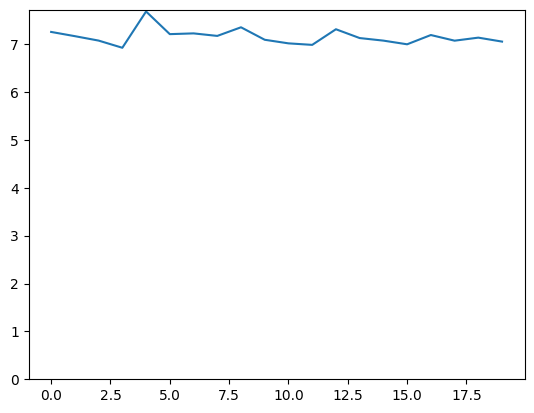

In [63]:
import pandas as pd

df = pd.DataFrame(metrics_pretrained_frawgrow)
df['train_losses'].plot(ylim = 0)

# Plots

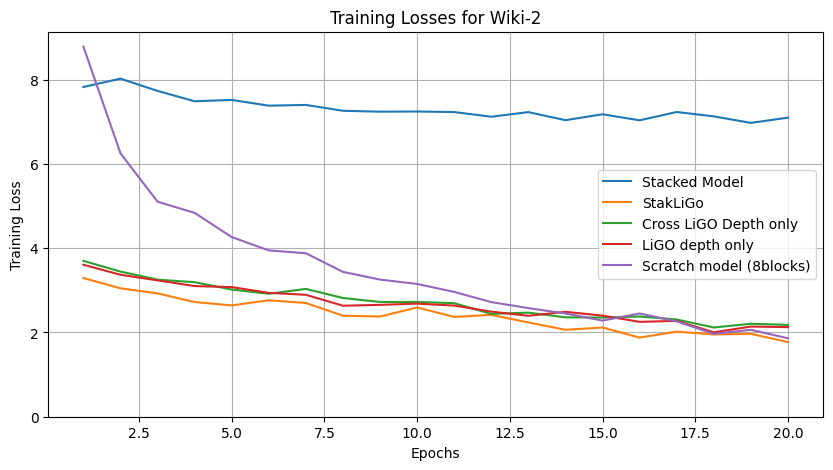

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Model names for reference
model_names = ["Stacked Model", "StakLiGo", "Cross LiGO Depth only", "LiGO depth only", "Scratch model (8blocks)"]
metrics_dfs = {
    "Stacked Model": pd.DataFrame(stacked_metrics),
    "StakLiGo": pd.DataFrame(sl_depth_metrics),
    "Cross LiGO Depth only": pd.DataFrame(cl_depth_metrics),
    "LiGO depth only": pd.DataFrame(ligo_depth_metrics),
    "Scratch model (8blocks)": pd.DataFrame(scratch_depth_width),
}

plt.figure(figsize=(10, 5))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["train_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Losses for Wiki-2")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


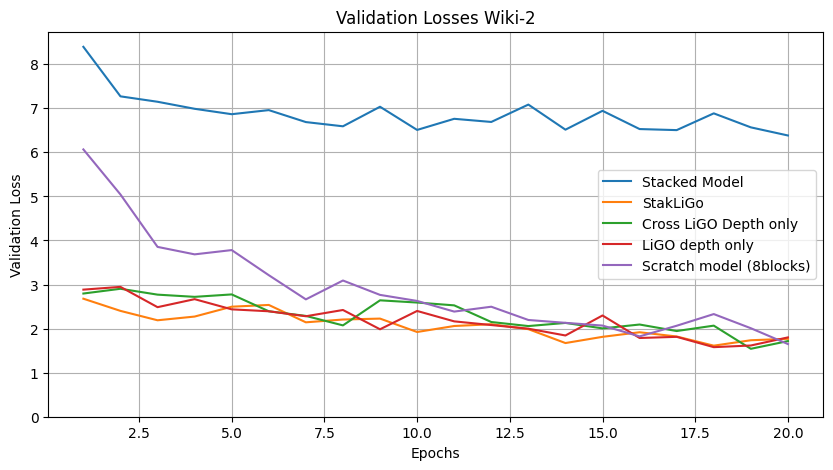

In [74]:
plt.figure(figsize=(10, 5))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["val_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Losses Wiki-2")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


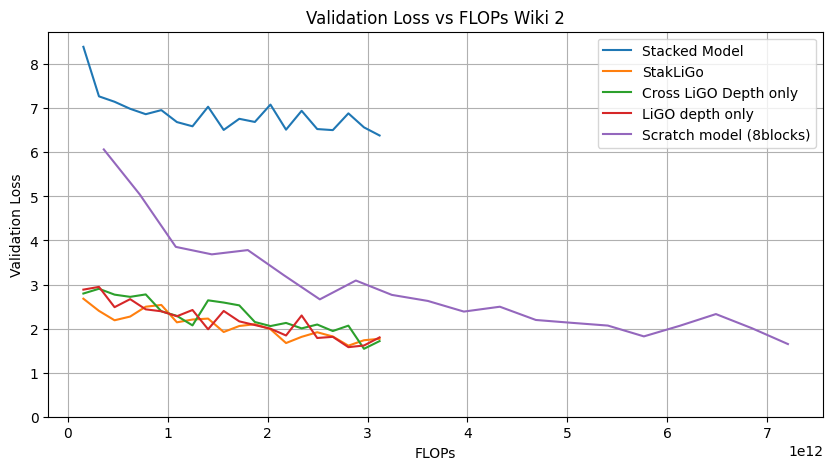

In [75]:
plt.figure(figsize=(10, 5))
for model1 in model_names:
    df = metrics_dfs[model1].sort_values(by="flops")  # Ensure FLOPs are sorted
    plt.plot(df["flops"], df["val_losses"], label=model1, linestyle='-')  # Line graph with markers
plt.xlabel("FLOPs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs FLOPs Wiki 2")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


# All plots

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Model names for reference
model_names = [
    "Stacked Model",
    "StakLiGo",
    "Cross LiGO Depth only",
    "LiGO depth only",
    "Scratch model (8blocks)",
    "Base model (4blocks)",
    "Periodic pretrained 4 -> 8",
    "Periodic 0 -> 8",
    "Convergence pretrained 4 -> 8",
    "Convergence 0 -> 8",
    "FrawGrow pretrained 4 -> 8",
    "FrawGrow 0 -> 8"
]

metrics_dfs = {
    "Stacked Model": pd.DataFrame(stacked_metrics),
    "StakLiGo": pd.DataFrame(sl_depth_metrics),
    "Cross LiGO Depth only": pd.DataFrame(cl_depth_metrics),
    "LiGO depth only": pd.DataFrame(ligo_depth_metrics),
    "Scratch model (8blocks)": pd.DataFrame(scratch_depth_width),
    "Base model (4blocks)": pd.DataFrame(metrics_basic_Shakespeare),
    "Periodic pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_periodic),
    "Periodic 0 -> 8": pd.DataFrame(metrics_basic_periodic),
    "Convergence pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_convergence),
    "Convergence 0 -> 8": pd.DataFrame(metrics_basic_convergence),
    "FrawGrow pretrained 4 -> 8": pd.DataFrame(metrics_pretrained_frawgrow),
    "FrawGrow 0 -> 8": pd.DataFrame(metrics_basic_frawgrow),

}

### Training Loss

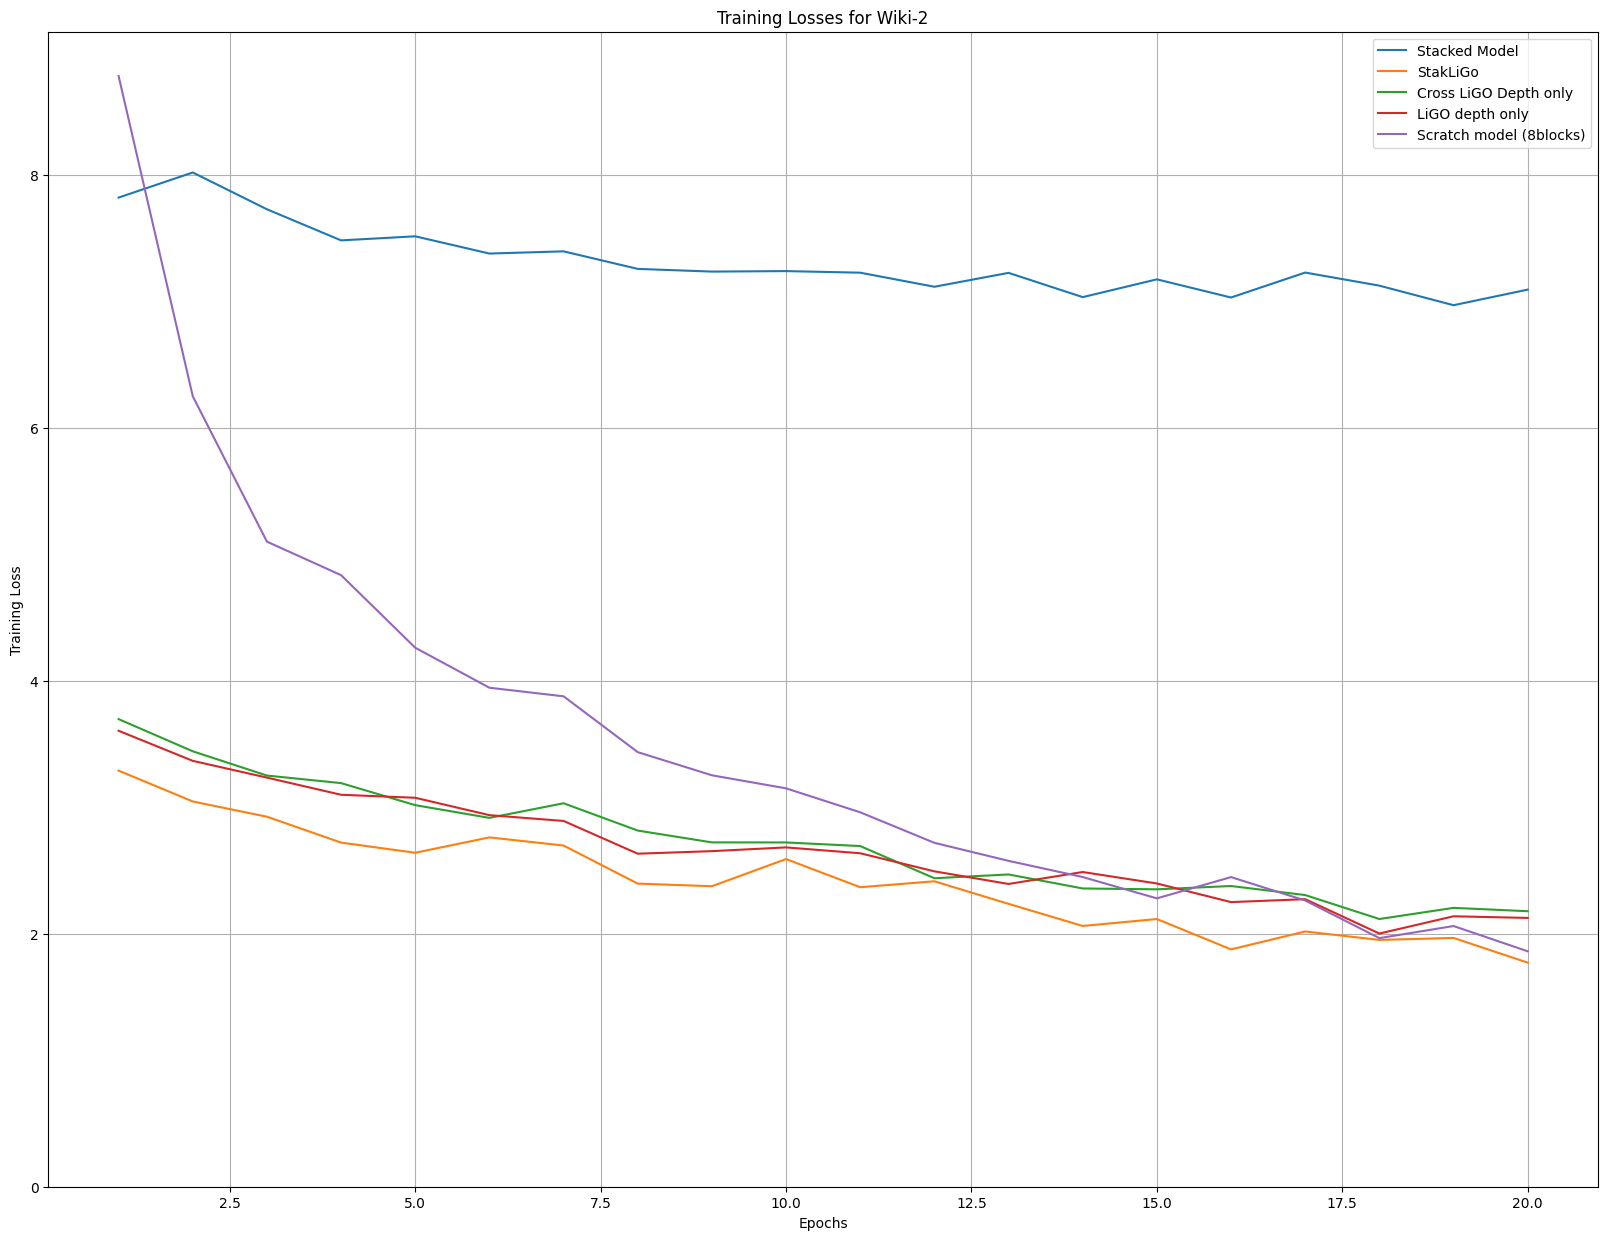

In [76]:
plt.figure(figsize=(20, 15))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["train_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Losses for Wiki-2")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


### Validation loss

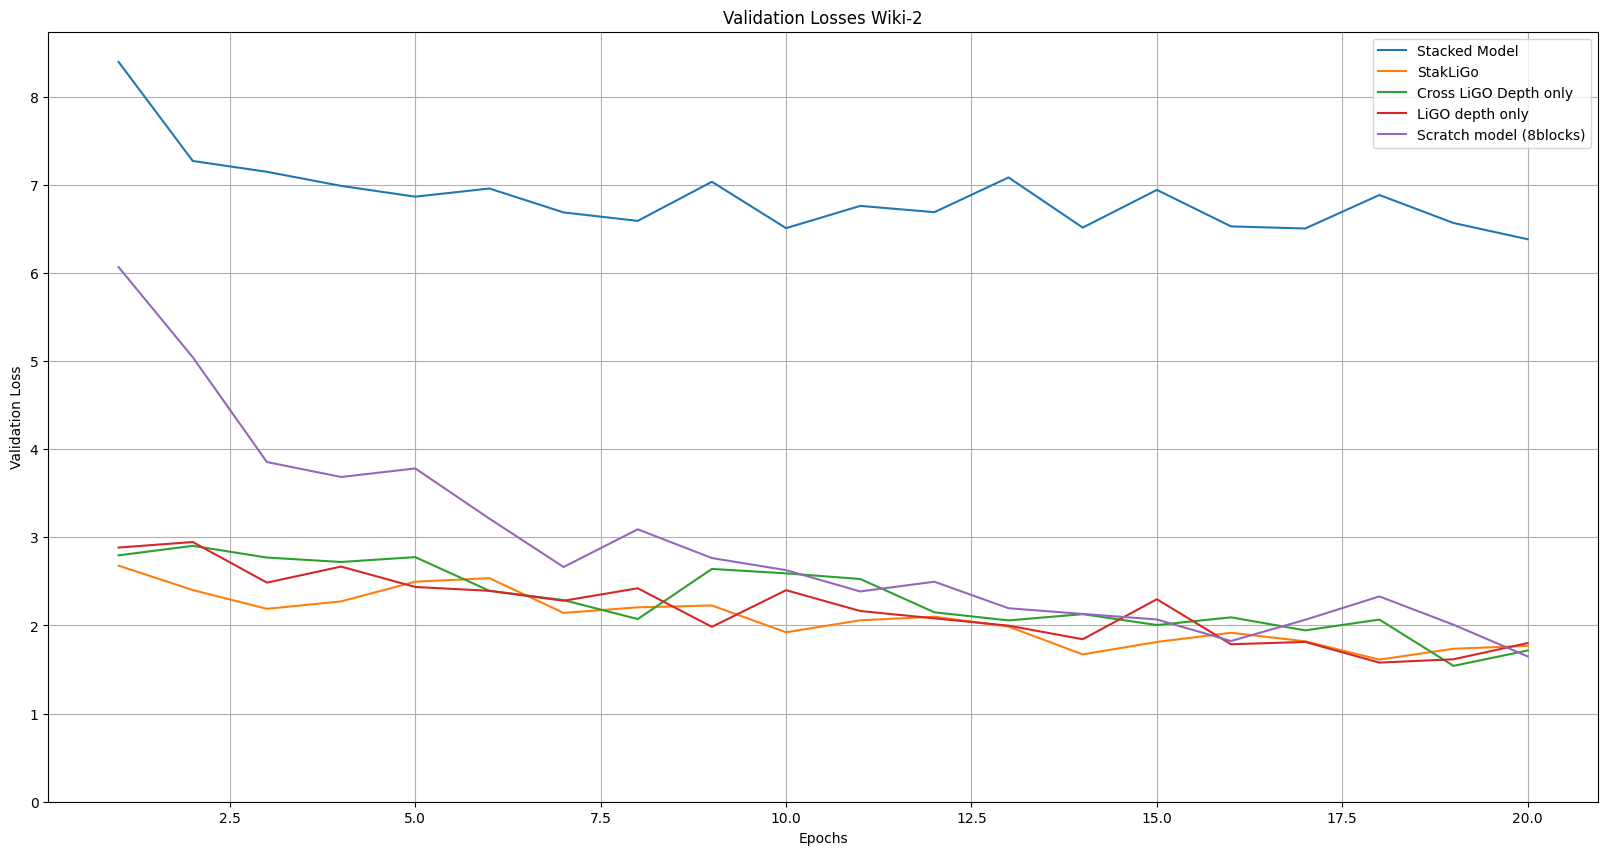

In [77]:
plt.figure(figsize=(20, 10))
for model1 in model_names:
    plt.plot(range(1, 21), metrics_dfs[model1]["val_losses"][:20], label=model1)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Losses Wiki-2")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


### Validation Loss Vs. TFLOPs

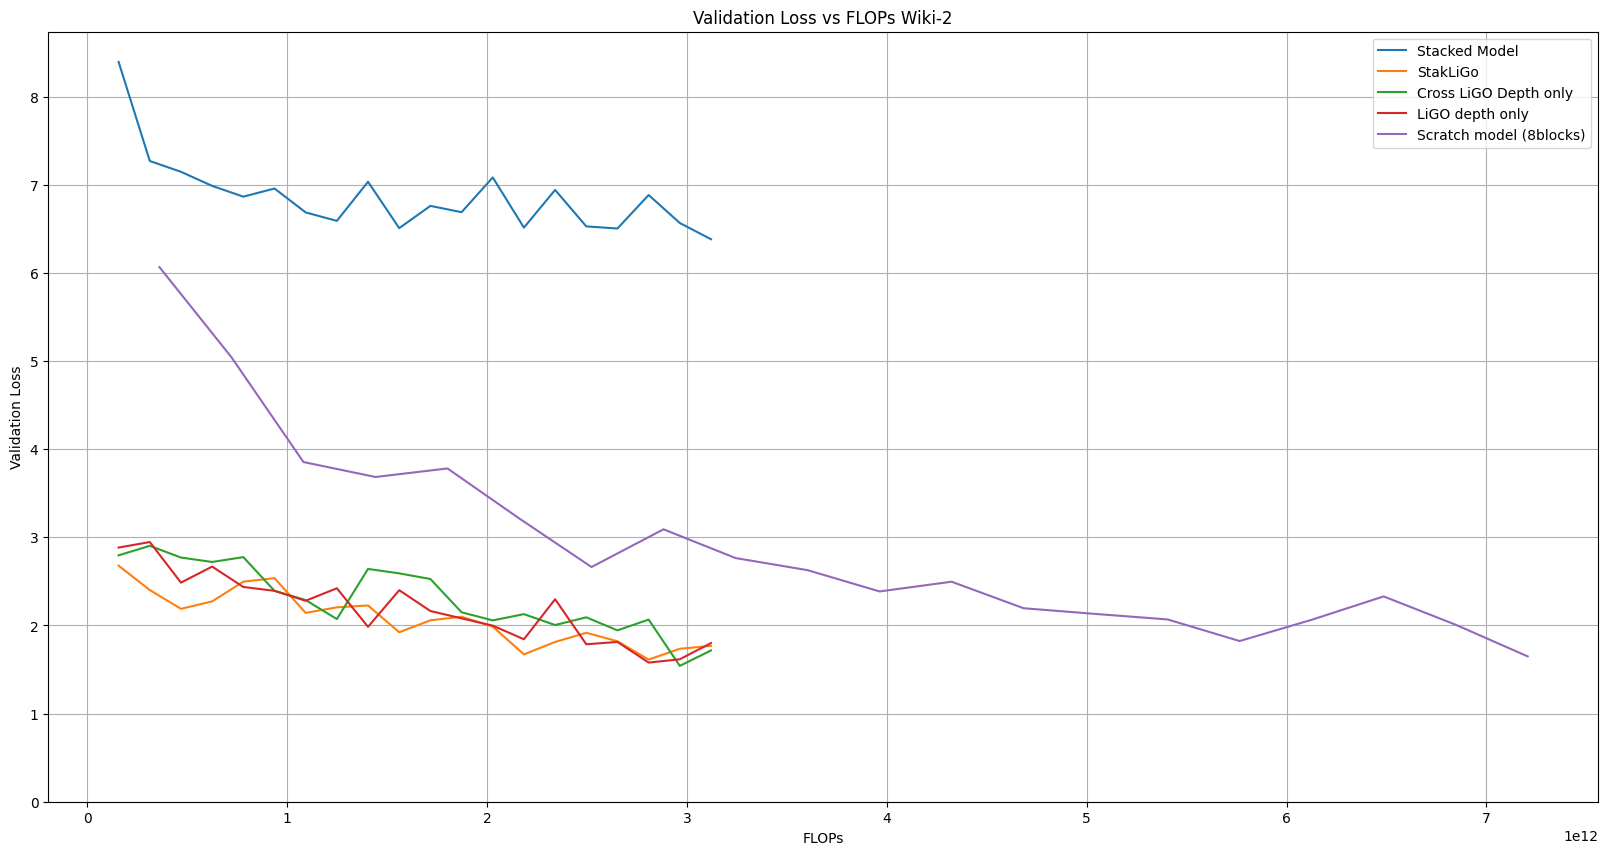

In [78]:
plt.figure(figsize=(20, 10))
for model1 in model_names:
    df = metrics_dfs[model1].sort_values(by="flops")  # Ensure FLOPs are sorted
    plt.plot(df["flops"], df["val_losses"], label=model1, linestyle='-')  # Line graph with markers
plt.xlabel("FLOPs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs FLOPs Wiki-2")
plt.legend()
plt.grid()
plt.ylim(bottom=0)  # Set Y-axis to start from 0
plt.show()


# When to Grow Policy

In [71]:
epochs = 500
add_blocks = 4

## Periodic Growth

In [72]:
# based on epochs and blocks -> each block will be added at epochs / (num_blocks+1)
# if epochs = 3, blocks = 2
# |-------base model--------|-----block1-----------|-----------block2----------|



## Convergence Growth

## LipGrow Method

## ORL FRAWGrow Policy

## Growth Order

## Appending

## Inserting in start

## RRS

# Hyperparameters

## α - learning rate